# __ZEIT4151__ Machine Learning [2025]
------
## Assessment 2
### __Author:__ Ben Charlton
### __zID:__ Z5482938

### __Dataset:__ The selected Dataset for this document is the __[Intrusion detection Dataset](https://www.kaggle.com/datasets/subhajournal/sdn-intrusion-detection)__


## Imports and Installations:

In [22]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install scipy
%pip install ipympl
%pip install ipyvolume ipywidgets
%pip install -U notebook widgetsnbextension
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [23]:
%matplotlib widget
import os
import math
import cmath
import numpy as np
import pandas as pd
import random
import json
import matplotlib.pyplot as plt
from scipy.special import jv
from itertools import product
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact
import seaborn as sb
import joblib
import warnings
import sympy as sp
from sympy import Eq, summation
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, mean_squared_error, r2_score
from sklearn.linear_model import RidgeClassifier, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.exceptions import UndefinedMetricWarning
from scipy.linalg import LinAlgWarning 
PI = math.pi

warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
warnings.filterwarnings("ignore", category=UserWarning)  # LinAlgWarning comes under UserWarnin

## Problem Description

The goal of the machine learning model produced in this document is to ingest network traffic captures and to then classify the traffic into the following categories:
- BENIGN
- DDos
- Web Attack   Brute Force
- Web Attack   Sql Injection
- Web Attack   XSS

To do this, the data will need to be evaluated, assessed, cleaned,  and will then undergo a series of different approaches to feature selection and dimensionality reduction before a variety of different machine learning models are trained to produce the most appropriate model with the highest degree of accuracy. 

Given that the dataset is labelled, supervised machine learning will be conducted.

This is because supervised machine learning models often produce more accurate predictions then unsupervised learning when it is able to directly learn the mapping between inputs and known outputs.

### Criteria for Success: 

The dataset is extremely skewed in the occurance frequency of different classes. 

As such, there is less material on which to train and test the rarer classes (Web Attack   Sql Injection, Web Attack   XSS).

To reflect this, there will be two success metrics with which the performance of the various machine learning models trained will be judged and compared:

#### 1. Macro Average:
__Macro Average__ is the average of each class’s accuracy, treating all classes equally. Macro Average indicates the performance of the model accross all classes, regardless of class commonality. As per the problem description, the purpose of the machine learning model to be created is to correctly detect and classify network traffic, not just common forms of network traffic. Hence, Macro Average is one of the two success metrics for this tasking, as it indicates whether the model is consistently accurate across both large and rare classes.

#### 2. Weighted Average:
__Weighted Average__ is the average of each class’s accuracy, weighted by the number of samples in each class. Weighted Average reflects the model’s overall effectiveness on the dataset as it actually occurs, since common classes contribute more heavily to the score. As per the problem description, the purpose of the machine learning model is to reliably classify real-world network traffic, where some types of traffic are far more frequent than others. Hence, Weighted Average is one of the two success metrics for this tasking, as it indicates whether the model achieves high accuracy in practice given the true distribution of network traffic.



In [24]:
K = sp.Symbol('K', positive=True, integer=True)  
i = sp.Symbol('i', integer=True)  
M = sp.Function('M')(i)  
n = sp.Function('n')(i)  
print("Variable definitions:")
print(f"  K : total number of classes in the dataset")
print(f"  i : index for a particular class (runs from 1 to K)")
print(f"  M(i) : metric for class i (e.g., accuracy, precision, recall, or F1)")
print(f"  n(i) : number of samples (support) in class i")
print("\n")
macro_avg = summation(M, (i, 1, K)) / K
weighted_avg = summation(n * M, (i, 1, K)) / summation(n, (i, 1, K))

display(Eq(sp.Symbol('Macro_Avg'), macro_avg))
display(Eq(sp.Symbol('Weighted_Avg'), weighted_avg))


Variable definitions:
  K : total number of classes in the dataset
  i : index for a particular class (runs from 1 to K)
  M(i) : metric for class i (e.g., accuracy, precision, recall, or F1)
  n(i) : number of samples (support) in class i




Eq(Macro_Avg, Sum(M(i), (i, 1, K))/K)

Eq(Weighted_Avg, Sum(M(i)*n(i), (i, 1, K))/Sum(n(i), (i, 1, K)))

## Thought Process:

As I have not done much Machine learning in the past, the approach taken to this task will be one of exploratory analysis. 

As discussed, this task will employ a variety of supervised machine learning models, due to the labelled nature of the dataset. 

The performance of these models will be judged through the success metrics (as defined above) in order to select the best machine learning model for the task. 

##### The following machine learning models will be employed and compared:

#### L2 Ridge (SGD)
Stochastic Gradient Descent with L2 penalty is a scalable way to train linear classifiers by iteratively updating weights on mini-batches of data. The L2 penalty adds a regularization term proportional to the square of the coefficients, helping prevent overfitting by shrinking weights.  

##### Best use case
- Large-scale classification tasks with high-dimensional data (e.g., text classification, online learning).  

##### Pros and cons
- **Pros:** Handles very large datasets, memory efficient, supports online learning.  
- **Cons:** Sensitive to learning rate, requires tuning, may converge to suboptimal solutions.  

---

#### Weighted Ridge
Weighted Ridge Regression applies L2 regularization with class weights to handle imbalanced data. The L2 penalty shrinks coefficients, and the weights give more importance to minority classes.  

##### Best use case
- Classification with imbalanced datasets where minority classes need more weight (e.g., fraud detection, medical diagnosis).  

##### Pros and cons
- **Pros:** Mitigates class imbalance, reduces overfitting, interpretable coefficients.  
- **Cons:** Still assumes linear relationships, weights must be set carefully.  

---

#### Unweighted Ridge
Unweighted Ridge Regression applies L2 regularization without class weights, treating all samples equally. The L2 penalty reduces coefficient magnitude to prevent overfitting while maintaining all features in the model.  

##### Best use case
- Balanced classification tasks where regularization helps prevent overfitting.  

##### Pros and cons
- **Pros:** Simple, fast, reduces multicollinearity issues.  
- **Cons:** Poor with imbalanced data, limited to linear separability.  

---

#### Weighted Logistic Regression
Logistic Regression with class weights adjusts for imbalanced datasets while providing probabilistic classification. The model penalizes misclassification of minority classes more heavily, improving performance on rare categories.  

##### Best use case
- Binary or multiclass problems with imbalanced distributions (e.g., rare disease detection, fraud detection).  

##### Pros and cons
- **Pros:** Interpretable coefficients, outputs probabilities, handles imbalance better.  
- **Cons:** Limited to linear boundaries, sensitive to outliers.  

---

#### Unweighted Logistic Regression
Unweighted Logistic Regression is a baseline linear classifier that estimates probabilities of classes. It works best with balanced datasets and linearly separable problems.  

##### Best use case
- Balanced classification tasks where interpretability and probabilities are important.  

##### Pros and cons
- **Pros:** Fast, interpretable, provides probability scores.  
- **Cons:** Performs poorly on imbalanced data, linear decision boundary only.  

---

#### Decision Tree
Decision Trees split data recursively into if-then rules, making them intuitive and interpretable. They can capture nonlinear relationships but are prone to overfitting if not pruned.  

##### Best use case
- When interpretability is key and relationships between features are nonlinear (e.g., customer segmentation, credit scoring).  

##### Pros and cons
- **Pros:** Easy to visualize, handles mixed feature types, captures non-linear patterns.  
- **Cons:** Unstable to small changes, prone to overfitting, less accurate alone.  

---

#### KNN
K-Nearest Neighbors is a non-parametric algorithm that classifies samples based on the labels of their nearest neighbors. It is simple and effective but computationally heavy at prediction time.  

##### Best use case
- Small to medium datasets with clear cluster structures (e.g., pattern recognition, recommendation systems).  

##### Pros and cons
- **Pros:** Simple, no training phase, captures non-linear patterns.  
- **Cons:** Slow predictions, sensitive to irrelevant features, poor in high dimensions.  


## Types of Fields:

### Methods to ingest data and evaluate field types:

In [25]:
def read_file(file_path: str) -> pd.DataFrame:
    """
    Reads a CSV file from the given file path into a pandas DataFrame.

    Parameters:
        file_path (str): Path to the CSV file.

    Returns:
        pd.DataFrame: DataFrame containing the contents of the CSV file.
    """
    return pd.read_csv(file_path)


def return_head(file_path: str, num_rows: int) -> pd.DataFrame:
    """
    Reads a CSV file and returns the first `num_rows` rows.

    Parameters:
        file_path (str): Path to the CSV file.
        num_rows (int): Number of rows to return from the top of the DataFrame.

    Returns:
        pd.DataFrame: The top `num_rows` rows of the DataFrame.
    """
    return read_file(file_path).head(num_rows)


def read_file_wIndex(file_path: str, index_column: str) -> pd.DataFrame:
    """
    Reads a CSV file and sets a specified column as the index.

    Parameters:
        file_path (str): Path to the CSV file.
        index_column (str): Column to use as the index of the DataFrame.

    Returns:
        pd.DataFrame: DataFrame with the specified index column.
    """
    return pd.read_csv(file_path, index_col=index_column)

    
def dataset_overview(dataframe: pd.DataFrame) -> dict:
    """
    Generates a summary overview of a pandas DataFrame, including:
    - Column counts
    - Presence of NaN or infinite values
    - Binary columns
    - Data types
    - Non-numeric columns

    Parameters:
        dataframe (pd.DataFrame): The DataFrame to analyze.

    Returns:
        dict: A dictionary containing various dataset characteristics.
    """
    overview = {}

    # Total number of columns in the DataFrame
    overview['num_columns'] = dataframe.shape[1]

    # Columns that contain at least one NaN value
    overview['columns_with_nan'] = dataframe.columns[dataframe.isna().any()].tolist()
    overview['num_columns_with_nan'] = len(overview['columns_with_nan'])

    # Columns that contain at least one infinite value (only for numeric columns)
    numeric_dataframe = dataframe.select_dtypes(include=[np.number])
    overview['columns_with_inf'] = numeric_dataframe.columns[np.isinf(numeric_dataframe).any()].tolist()
    overview['num_columns_with_inf'] = len(overview['columns_with_inf'])

    """
    Identify binary columns:
    These are columns whose unique non-null values are limited to either:
    - {0, 1}
    - {True, False}
    """
    binary_columns = []
    for column in dataframe.columns:
        unique_values = dataframe[column].dropna().unique()
        if set(unique_values).issubset({0, 1}) or set(unique_values).issubset({True, False}):
            binary_columns.append(column)

    overview['binary_columns'] = binary_columns
    overview['num_binary_columns'] = len(binary_columns)

    # A breakdown of column data types and their counts
    overview['column_types'] = dataframe.dtypes.value_counts().to_dict()

    # List of columns that are not numeric
    overview['non_numeric_columns'] = dataframe.select_dtypes(exclude=[np.number]).columns.tolist()

    return overview

def summarize_columns(dataframe: pd.DataFrame) -> pd.DataFrame:
    """
    Generates a summary DataFrame with statistics for each column including:
    - Data type
    - Minimum value (for numeric columns)
    - Maximum value (for numeric columns)
    - Standard deviation (for numeric columns)
    - Constancy (proportion of most frequent value)

    Parameters:
        dataframe (pd.DataFrame): Input DataFrame to summarize.

    Returns:
        pd.DataFrame: Summary DataFrame with one row per column.
    """
    summary = []

    for column in dataframe.columns:
        dtype = dataframe[column].dtype

        # For numeric columns, calculate min, max, and standard deviation
        if pd.api.types.is_numeric_dtype(dtype):
            column_min = dataframe[column].min()
            column_max = dataframe[column].max()
            column_std = dataframe[column].std()
        else:
            # For non-numeric columns, these stats are not applicable
            column_min = np.nan
            column_max = np.nan
            column_std = np.nan

        # Calculate constancy: proportion of the most frequent value including NaNs
        top_frequency = dataframe[column].value_counts(normalize=True, dropna=False).iloc[0]

        summary.append({
            'Column': column,
            'DataType': str(dtype),
            'Min': column_min,
            'Max': column_max,
            'StdDev': column_std,
            'Constancy': top_frequency
        })

    return pd.DataFrame(summary)

def summarize_column_correlations(dataframe: pd.DataFrame, method: str = 'pearson') -> pd.DataFrame:
    """
    Calculates pairwise correlations between numeric columns of a DataFrame.

    Parameters:
        dataframe (pd.DataFrame): Input DataFrame to analyze.
        method (str): Correlation method to use ('pearson', 'spearman', 'kendall'). Default is 'pearson'.

    Returns:
        pd.DataFrame: DataFrame with columns ['Column_1', 'Column_2', 'Correlation']
                      listing correlation for each unique pair of columns.
    """
    # Select only numeric columns for correlation analysis
    numeric_dataframe = dataframe.select_dtypes(include='number')

    # Compute correlation matrix using specified method
    correlation_matrix = numeric_dataframe.corr(method=method)

    correlations = []

    # Loop over upper triangle of correlation matrix to avoid duplicate pairs
    columns = correlation_matrix.columns
    for i in range(len(columns)):
        for j in range(i + 1, len(columns)):
            column_1 = columns[i]
            column_2 = columns[j]
            corr_value = correlation_matrix.iloc[i, j]

            correlations.append({
                'Column_1': column_1,
                'Column_2': column_2,
                'Correlation': corr_value
            })

    return pd.DataFrame(correlations)


### Evaluating the dataset:

In [26]:
file_path = 'dataset2.csv'

dataframe = read_file_wIndex(file_path, "Unnamed: 0")
# Strip leading/trailing spaces from column names
dataframe.columns = dataframe.columns.str.strip()

dataset_overview(dataframe)

{'num_columns': 79,
 'columns_with_nan': ['Flow Bytes/s'],
 'num_columns_with_nan': 1,
 'columns_with_inf': ['Flow Bytes/s', 'Flow Packets/s'],
 'num_columns_with_inf': 2,
 'binary_columns': ['Fwd PSH Flags',
  'Bwd PSH Flags',
  'Fwd URG Flags',
  'Bwd URG Flags',
  'FIN Flag Count',
  'SYN Flag Count',
  'RST Flag Count',
  'PSH Flag Count',
  'ACK Flag Count',
  'URG Flag Count',
  'CWE Flag Count',
  'ECE Flag Count',
  'Fwd Avg Bytes/Bulk',
  'Fwd Avg Packets/Bulk',
  'Fwd Avg Bulk Rate',
  'Bwd Avg Bytes/Bulk',
  'Bwd Avg Packets/Bulk',
  'Bwd Avg Bulk Rate'],
 'num_binary_columns': 18,
 'column_types': {dtype('int64'): 54, dtype('float64'): 24, dtype('O'): 1},
 'non_numeric_columns': ['Class']}

### Dataset Observations:

From the code above, it is clear that the dataset contains __`18` binary columns__ indicating different flags, each as int64 columns with values of `[1,0]`

Likewise, it is clear the only non-numeric column is the __`Class` Column__, which likely contains the class labels. 

Indicating that some form of cleaning will be required, it was also found that the __`Flow Bytes/s` Column__ contains `NaN` or `Null` Values and that the __`Flow Bytes/s` and `Flow Packets/s` Columns contain Inf Values__

As there are 79 Columns in this dataset, it is clear that this task will require a large degree of feature selection and dimensionality reduction given the scale of the dataset. 

Given that the data is network traffic captures, one would expect that there will be a variety of constant or relatively constant columns, which will be the first point of call for reducing the number of columns (because columns with high or complete constancy hold very week predictive relevance) 

Likewise, given the nature of the data, one would expect a large variety of the columns to have a high degree of correlation, which will be the second point of call for reducing the number of columns to avoid bias or redundancy.

### Cleaning Methods

In [27]:
def clean_const_threshold(dataframe: pd.DataFrame, threshold: float) -> pd.DataFrame:
    """
    Drops columns from a DataFrame where the most frequent value exceeds the constancy threshold.

    Parameters:
        dataframe (pd.DataFrame): Input DataFrame.
        threshold (float): Maximum allowed constancy ratio.

    Returns:
        pd.DataFrame: DataFrame with high-constancy columns removed.
    """
    high_constancy_columns = [
        column for column in dataframe.columns
        if dataframe[column].value_counts(normalize=True).iloc[0] >= threshold
    ]

    return dataframe.drop(columns=high_constancy_columns)


def clean_inf_nan(dataframe: pd.DataFrame) -> pd.DataFrame:
    """
    Replaces Inf values with NaN, then drops all rows containing NaN.

    Parameters:
        dataframe (pd.DataFrame): Input DataFrame.

    Returns:
        pd.DataFrame: Cleaned DataFrame with no Inf or NaN values.
    """
    return dataframe.replace([np.inf, -np.inf], np.nan).dropna()


def clean_const(dataframe: pd.DataFrame) -> pd.DataFrame:
    """
    Removes columns that contain only one unique value.

    Parameters:
        dataframe (pd.DataFrame): Input DataFrame.

    Returns:
        pd.DataFrame: DataFrame with constant columns removed.
    """
    return dataframe.loc[:, dataframe.nunique() > 1]


def clean_non_numeric(dataframe: pd.DataFrame) -> pd.DataFrame:
    """
    Filters the DataFrame to only numeric and boolean columns.
    Converts boolean columns to integers.

    Parameters:
        dataframe (pd.DataFrame): Input DataFrame.

    Returns:
        pd.DataFrame: DataFrame with only numeric data (boolean as int).
    """
    numeric_boolean_dataframe = dataframe.select_dtypes(include=['number', 'bool']).copy()

    # Identify boolean columns and convert to integer
    boolean_columns = numeric_boolean_dataframe.select_dtypes(include=['bool']).columns
    numeric_boolean_dataframe[boolean_columns] = numeric_boolean_dataframe[boolean_columns].astype(int)

    return numeric_boolean_dataframe


def get_binary_columns_with_values(dataframe: pd.DataFrame) -> pd.DataFrame:
    """
    Identifies binary columns and lists their unique values.

    Parameters:
        dataframe (pd.DataFrame): Input DataFrame.

    Returns:
        pd.DataFrame: A DataFrame with binary column names and their unique values.
    """
    binary_info = []

    for column in dataframe.columns:
        unique_values = dataframe[column].dropna().unique()
        if set(unique_values).issubset({0, 1}) or set(unique_values).issubset({0.0, 1.0}):
            binary_info.append({
                "column": column,
                "values": sorted(unique_values.tolist())
            })

    return pd.DataFrame(binary_info)


def calc_const_columns_by_threshold(dataframe: pd.DataFrame, threshold: float) -> pd.DataFrame:
    """
    Calculates which columns exceed a given constancy threshold.

    Parameters:
        dataframe (pd.DataFrame): Input DataFrame.
        threshold (float): Constancy threshold (e.g., 0.95 means 95%+ same value).

    Returns:
        pd.DataFrame: DataFrame listing constant columns and their constancy ratio.
    """
    constant_info = []

    for column in dataframe.columns:
        most_frequent_ratio = dataframe[column].value_counts(normalize=True).iloc[0]
        if most_frequent_ratio >= threshold:
            constant_info.append({
                "column": column,
                "constancy_ratio": most_frequent_ratio
            })

    return pd.DataFrame(constant_info)


def calc_nan_inf_columns(dataframe: pd.DataFrame) -> pd.DataFrame:
    """
    Returns a DataFrame listing columns with NaN and Inf values,
    along with the count of each type per column.

    Parameters:
        dataframe (pd.DataFrame): Input DataFrame.

    Returns:
        pd.DataFrame: Columns with ['column', 'num_nan', 'num_inf'] summary.
    """
    summary = []

    for column in dataframe.columns:
        column_data = dataframe[column]
        num_nan = column_data.isna().sum()
        num_inf = np.isinf(column_data).sum() if np.issubdtype(column_data.dtype, np.number) else 0

        if num_nan > 0 or num_inf > 0:
            summary.append({
                "column": column,
                "num_nan": num_nan,
                "num_inf": num_inf
            })

    return pd.DataFrame(summary)


def clean_highly_correlated(dataframe: pd.DataFrame, threshold: float) -> pd.DataFrame:
    """
    Drops one of each pair of highly correlated columns above a threshold.
    Between two correlated columns, the one with the longer name is dropped.

    Parameters:
        dataframe (pd.DataFrame): Input DataFrame.
        threshold (float): Correlation threshold above which columns are considered redundant.

    Returns:
        pd.DataFrame: DataFrame with highly correlated columns removed.
    """
    # Select only numeric columns for correlation analysis
    numeric_dataframe = dataframe.select_dtypes(include='number')

    # Compute absolute correlation matrix
    correlation_matrix = numeric_dataframe.corr().abs()
    columns_to_drop = set()

    """
    Loop through upper triangle of the correlation matrix to find column pairs
    that exceed the threshold. Drop the one with the longer name.
    """
    for column1_index in range(len(correlation_matrix.columns)):
        for column2_index in range(column1_index + 1, len(correlation_matrix.columns)):
            column1 = correlation_matrix.columns[column1_index]
            column2 = correlation_matrix.columns[column2_index]

            correlation_value = correlation_matrix.iloc[column1_index, column2_index]
            if correlation_value >= threshold:
                if len(column1) >= len(column2):
                    columns_to_drop.add(column1)
                else:
                    columns_to_drop.add(column2)

    return dataframe.drop(columns=list(columns_to_drop))


### Graphing Methods:

In [28]:
def correlation_analysis(dataframe : pd.DataFrame, print_corr_matrix: bool = True):
    numeric_dataframe = dataframe.select_dtypes(include='number')
    print(f"Number of columns: {len(numeric_dataframe.columns.tolist())}")
    corr_matrix = numeric_dataframe.corr()

    # Plot heatmap
    plt.figure(figsize=(15,15))
    plt.imshow(corr_matrix, cmap="coolwarm", interpolation="none")
    plt.colorbar(label="Correlation")
    plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=45)
    plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
    plt.title("Feature Correlation Heatmap")
    plt.show()
    if print_corr_matrix:
        print("Correlation Matrix:")
        print(corr_matrix)

### Functions for Splitting Data into Training, Validation, and Testing

In [29]:
def split_data_stratified(data, labels, data_split_ratio, random_state):
    if data_split_ratio >=1:
        raise ValueError(f"{data_split_ratio=} must be > 1")
        
    return train_test_split(
        data, labels, 
        test_size = (1 - data_split_ratio),
        stratify = labels,
        random_state = random_state
    )

def perform_data_split(dataframe, label_column, training_split_ratio, 
                       validation_split_ratio, test_split_ratio, random_state):
    if sum((training_split_ratio, validation_split_ratio, test_split_ratio)) != 1:
        raise ValueError("Sum of train_frac (training_split_ratio, validation_split_ratio, test_split_ratio) must equal 1.0")
    data = dataframe.drop(columns=[label_column])
    labels = dataframe[label_column]

    training_set, temp_set, training_labels, temp_labels = (
        split_data_stratified(data, labels, training_split_ratio, random_state)
    )
    
    validation_set, test_set, validation_labels, test_labels = (
        split_data_stratified(
            temp_set, temp_labels,
            validation_split_ratio / (validation_split_ratio + test_split_ratio),
            random_state
        )
    )

    return (
        training_set, training_labels, 
        validation_set, validation_labels, 
        test_set, test_labels
    )

### Methods for Feature Selection and Dimensionality Reduction

In [30]:
def anova_f_test(dataframe: pd.DataFrame, class_column: str, numFeatures: int) -> pd.DataFrame:
    """
    Compute ANOVA F-test scores for numeric features in a DataFrame.
    
    Parameters:
        dataframe : pd.DataFrame
            Input dataframe with features and class column
        class_column : str
            Name of the target column
        numFeatures : int
            Number of top features to select (passed to SelectKBest)
            
    Returns:
        pd.DataFrame with columns 'Feature' and 'F-Score', sorted descending
    """
    # Select numeric columns
    numeric_feature_names = dataframe.select_dtypes(include='number').columns
    
    # Apply SelectKBest (ANOVA F-test)
    anova_selector = SelectKBest(score_func=f_classif, k=numFeatures)
    anova_selector.fit(dataframe[numeric_feature_names], dataframe[class_column])
    
    # Create DataFrame with scores
    return pd.DataFrame({
        'Feature': numeric_feature_names,
        'F-Score': anova_selector.scores_
    }).sort_values(by='F-Score', ascending=False)

def anova_f_test_plot(dataframe: pd.DataFrame, class_column: str, numFeatures: int):
    """
    Plot top numeric features based on ANOVA F-test.
    
    Parameters:
        dataframe : pd.DataFrame
            Input dataframe with features and class column
        class_column : str
            Name of the target column
        numFeatures : int
            Number of top features to plot
    """
    anova_result = anova_f_test(dataframe, class_column, numFeatures)
    
    # Take top 'numFeatures' rows
    top_features = anova_result.head(numFeatures)
    
    # Plot
    plt.figure(figsize=(8, 5))
    plt.bar(top_features['Feature'], top_features['F-Score'], color='skyblue')
    plt.xlabel('Feature')
    plt.ylabel('ANOVA F-score')
    plt.title(f'Top {numFeatures} Numeric Feature Importance (ANOVA F-test)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


def random_forest_feature_importance(
    dataframe: pd.DataFrame, class_column: str, num_features: int
) -> pd.DataFrame:
    """
    Compute feature importances using Random Forest for numeric columns only.
    Automatically ignores the target column even if non-numeric.
    """
    # Select numeric columns only and exclude the target if it happens to be numeric
    numeric_feature_names = [
        column for column in dataframe.select_dtypes(include='number').columns
        if column != class_column
    ]

    # Fit Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=1)
    rf.fit(dataframe[numeric_feature_names], dataframe[class_column])

    # Create a DataFrame with importances
    importance_dataframe = pd.DataFrame({
        'Feature': numeric_feature_names,
        'Importance': rf.feature_importances_
    }).sort_values(by='Importance', ascending=False)

    return importance_dataframe.head(num_features)


def random_forest_feature_importance_plot(
    dataframe: pd.DataFrame, class_column: str, num_features: int
):
    """
    Plot the top N Random Forest feature importances.
    """
    rf_result = random_forest_feature_importance(dataframe, class_column, num_features)

    plt.figure(figsize=(8, 5))
    plt.bar(rf_result['Feature'], rf_result['Importance'], color='skyblue')
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.title(f'Top {num_features} Feature Importances (Random Forest)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def pca_explained_variance(dataframe: pd.DataFrame, num_components: int, class_column: str) -> pd.DataFrame:
    """
    Perform PCA on numeric columns of a DataFrame and return explained variance.

    Parameters:
        dataframe: Input DataFrame
        num_components: Number of PCA components to keep
        class_column: Name of the target column (optional, will be excluded)

    Returns:
        DataFrame with PCA component and explained variance ratio
    """
    # Select numeric columns, excluding the class column if present
    numeric_columns = [column for column in dataframe.select_dtypes(include='number').columns
                    if column != class_column]

    # Fit PCA
    pca = PCA(n_components=num_components)
    pca.fit(dataframe[numeric_columns])

    # Create DataFrame with explained variance
    pca_dataframe = pd.DataFrame({
        'PC': [f'PC{i+1}' for i in range(num_components)],
        'ExplainedVariance': pca.explained_variance_ratio_
    })

    return pca_dataframe


def pca_explained_variance_plot(dataframe: pd.DataFrame, num_components: int, class_column: str):
    """
    Plot explained variance of PCA components.
    """
    pca_dataframe = pca_explained_variance(dataframe, num_components, class_column)

    plt.figure(figsize=(8, 5))
    plt.bar(pca_dataframe['PC'], pca_dataframe['ExplainedVariance'], color='skyblue')
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance Ratio')
    plt.title(f'Top {num_components} PCA Components Explained Variance')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def random_forest_permutation_pvalues(
    dataframe: pd.DataFrame,
    class_column: str,
    n_permutations: int,
    random_state: int = 1
) -> pd.DataFrame:
    """
    Compute Random Forest feature importances with permutation-based p-values.

    Parameters:
        dataframe : pd.DataFrame
            Input dataframe including target
        class_column : str
            Name of target column
        n_permutations : int
            Number of permutation iterations
        random_state : int
            Random seed for reproducibility

    Returns:
        pd.DataFrame with columns: Feature, Importance, p-value
    """
    # Numeric features only
    numeric_features = [column for column in dataframe.select_dtypes(include='number').columns
                        if column != class_column]
    dataset = dataframe[numeric_features]
    labels = dataframe[class_column]

    # Fit Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=random_state)
    rf.fit(dataset, labels)

    # Permutation importance
    perm_importance = permutation_importance(rf, dataset, labels, n_repeats=n_permutations,
                                             random_state=random_state)

    # Compute permutation p-values
    p_values = []
    for idx, imp in enumerate(perm_importance.importances_mean):
        # fraction of times permuted importance >= actual importance
        greater_equal = np.sum(perm_importance.importances[idx] >= imp)
        p_val = greater_equal / n_permutations
        p_values.append(p_val)

    return pd.DataFrame({
        'Feature': numeric_features,
        'Importance': perm_importance.importances_mean,
        'p-value': p_values
    }).sort_values(by='Importance', ascending=False)

def plot_combined_features(significant_dataframe: pd.DataFrame, alpha: float = 0.05):
    """
    Plot Random Forest importances of features that are also significant in ANOVA.
    """
    plt.figure(figsize=(8,5))
    colors = ['green' if p < alpha else 'gray' for p in significant_dataframe['p-value']]
    plt.bar(significant_dataframe['Feature'], significant_dataframe['Importance'], color=colors)
    plt.xlabel('Feature')
    plt.ylabel('Random Forest Importance')
    plt.title('Features Significant in ANOVA and RF (Permutation p-values)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

### Way too long, not neccesssary, instead sample smaller stratified
def run_random_forest_perm(dataframe: pd.DataFrame, class_column: str,
                           n_estimators: int = 50, n_permutations: int = 20,
                           random_state: int = 1) -> pd.DataFrame: # with 20 permutations, can get down to p score of 0.05
    dataset = dataframe.drop(columns=[class_column])
    labels = LabelEncoder().fit_transform(dataframe[class_column])  # Encode class labels
    print("Labels encoded, beginning Random Forest...")

    random_forest = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state, n_jobs=-1)
    print("Random Forest Completed, beginning fit...")
    random_forest.fit(dataset, labels)
    print("Fit completed, beginning calculation of permutation importance...")
    perm_importance = permutation_importance(
        random_forest, dataset, labels, n_repeats=n_permutations, 
        random_state=random_state, n_jobs=-1
    )

    random_forest_results = pd.DataFrame({
        "Feature": dataset.columns,
        "RF Importance": perm_importance.importances_mean,
        "RF Std": perm_importance.importances_std,
        "RF p-value": np.mean(perm_importance.importances <= 0, axis=1)
    }).sort_values("RF p-value")

    random_forest_results.to_csv("random_forest_results.csv", index=False)
    return random_forest_results

def select_features_rf(
    dataframe: pd.DataFrame,
    class_column: str,
    sample_frac: float = 0.25,  # small representative sample
    n_estimators: int = 50,
    top_n: int = 10,
    random_state: int = 1
):
    """
    Identify important features using a Random Forest on a stratified sample.

    Returns a DataFrame with the top_n features ranked by importance.
    """
    # Stratified sampling
    sampled_dataframe, _ = train_test_split(
        dataframe,
        train_size=sample_frac,
        stratify=dataframe[class_column],
        random_state=random_state
    )
    
    # Encode labels
    dataset = sampled_dataframe.drop(columns=[class_column])
    labels= LabelEncoder().fit_transform(sampled_dataframe[class_column])
    
    # Fit Random Forest
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state, n_jobs=-1)
    rf.fit(dataset, labels)
    
    # Feature importances
    feature_importances = pd.DataFrame({
        "Feature": dataset.columns,
        "Importance": rf.feature_importances_
    }).sort_values(by="Importance", ascending=False)
    
    # Return top_n features
    return feature_importances.head(top_n)
def rf_significant_features(dataframe: pd.DataFrame, class_column: str,
                            sample_frac: float = 0.25,
                            n_estimators: int = 50,
                            n_permutations: int = 20,
                            alpha: float = 0.05,
                            random_state: int = 1) -> pd.DataFrame:
    """
    Identify statistically significant features using Random Forest with permutation importance.
    
    Parameters:
        dataframe: Input DataFrame
        class_column: Column name of the categorical target
        sample_frac: Fraction of data to sample (stratified)
        n_estimators: Number of trees in Random Forest
        n_permutations: Number of permutation repeats
        alpha: Significance threshold for p-value
        random_state: Random seed
        
    Returns:
        DataFrame of features with p-value <= alpha
    """
    # Separate features and labels
    dataset = dataframe.drop(columns=[class_column])
    labels = LabelEncoder().fit_transform(dataframe[class_column])
    print("Encoding Completed, beginning stratified sampling...")
    # Stratified sampling
    _, dataset_sample, _, labels_sample = train_test_split(
        dataset, labels, stratify=labels, test_size=sample_frac, random_state=random_state
    )
    print("Stratified Sampling Completed, beginning Fit...")
    # Fit Random Forest
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state, n_jobs=-1)
    rf.fit(dataset_sample, labels_sample)
    
    print("Fit Completed, beginning Permutation...")
    # Permutation importance
    perm_imp = permutation_importance(
        rf, dataset_sample, labels_sample, n_repeats=n_permutations,
        random_state=random_state, n_jobs=-1
    )
    print("Permutation Completed, beginning p-score computation and data compilation...")
    # Compute p-values
    p_values = np.mean(perm_imp.importances <= 0, axis=1)
    
    # Compile results
    results = pd.DataFrame({
        "Feature": dataset.columns,
        "Importance": perm_imp.importances_mean,
        "Std": perm_imp.importances_std,
        "p_value": p_values
    })
    
    # Filter by significance
    significant_features = results[results["p_value"] <= alpha].sort_values("p_value")
    
    # Save CSV for later use
    significant_features.to_csv("rf_significant_features.csv", index=False)
    
    return significant_features

def plot_rf_importance_csv_3d(csv_file: str):
    """
    Plot a 3D bar chart of Random Forest feature importances from a CSV.
    X-axis: feature names
    Y-axis: importance
    Z-axis: p-value
    Bar color: std deviation
    """
    dataframe = pd.read_csv(csv_file)
    print(f"{dataframe.columns.tolist()}")
    columns = dataframe.columns.tolist()
    features = dataframe[columns[0]]
    importance = dataframe[columns[1]]
    p_values = dataframe[columns[3]]
    stds = dataframe[columns[2]]
    
    # Normalize std to 0-1 for colormap
    norm = (stds - stds.min()) / (stds.max() - stds.min())
    colors = plt.cm.viridis(norm)
    
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    x_pos = np.arange(len(features))
    y_pos = importance
    z_pos = p_values
    
    dx = np.ones_like(x_pos) * 0.6
    dy = y_pos
    dz = z_pos
    
    ax.bar3d(x_pos, np.zeros_like(x_pos), np.zeros_like(x_pos),
             dx, dy, dz, color=colors, shade=True)
    
    ax.set_xticks(x_pos)
    ax.set_xticklabels(features, rotation=90)
    ax.set_xlabel("Feature")
    ax.set_ylabel("Importance")
    ax.set_zlabel("'p-value'")
    ax.set_title('Random Forest Feature Importance (3D)')
    
    plt.tight_layout()
    plt.show()

def plot_rf_importance(csv_path: str):
    """
    Plot a 2D bar graph of Random Forest feature importance.
    
    Parameters:
        csv_path (str): Path to CSV containing columns:
                        'Feature', 'Importance', 'Std', 'p-value'
    """
    # Load results
    dataframe = pd.read_csv(csv_path)
    
    # Sort features by importance
    dataframe = dataframe.sort_values(by='Importance', ascending=False)
    
    # Normalize std for coloring (0 to 1)
    std_norm = (dataframe['Std'] - dataframe['Std'].min()) / (dataframe['Std'].max() - dataframe['Std'].min() + 1e-10)
    colors = plt.cm.viridis(std_norm)  # colormap by std deviation

    # Create figure
    plt.figure(figsize=(10, 8))
    
    bars = plt.barh(dataframe['Feature'], dataframe['Importance'], color=colors)
    
    # Label p-value on each bar
    for bar, pval in zip(bars,  dataframe[(dataframe.columns.tolist())[3]]):
        plt.text(
            bar.get_width() + 0.001 * dataframe['Importance'].max(),  # offset from bar end
            bar.get_y() + bar.get_height() / 2,
            f"p={pval:.3f}",
            va='center', ha='left', fontsize=8
        )
    
    plt.xlabel("Random Forest Importance")
    plt.ylabel("Feature")
    plt.title("Feature Importance with P-values (colored by std)")
    
    # Extend x-axis slightly to fit p-value labels
    plt.xlim(0, dataframe['Importance'].max() * 1.1)
    
    plt.tight_layout()
    plt.show()

def run_rf_all_features_stratified(
    dataframe: pd.DataFrame,
    class_column: str,
    sample_fraction: float = 1.0,
    n_estimators: int = 100,
    n_permutations: int = 20,
    random_state: int = 1,
    output_csv: str = "rf_all_features_stratified.csv"
) -> pd.DataFrame:
    """
    Runs Random Forest on all features with optional stratified sampling,
    calculates permutation importance, standard deviation, and p-values,
    then saves results to CSV.

    Parameters:
        dataframe (pd.DataFrame): Input data including features and target
        class_column (str): Name of the target column (categorical)
        sample_fraction (float): Fraction of dataset to use (0 < sample_fraction <= 1)
        n_estimators (int): Number of trees in the forest
        n_permutations (int): Number of permutations for p-value estimation
        random_state (int): Random state for reproducibility
        output_csv (str): CSV file path to save results

    Returns:
        pd.DataFrame with columns: Feature, RF Importance, RF Std, RF p-value
    """
    # Separate features and target
    dataset = dataframe.drop(columns=[class_column])
    labels= dataframe[class_column]
    
    # Stratified sampling if fraction < 1
    if sample_fraction < 1.0:
        dataset, _, labels, _ = train_test_split(
            dataset, labels,
            train_size=sample_fraction,
            stratify=labels,
            random_state=random_state
        )
        #print(f"Stratified sample: {len(dataset)} rows")
    print("Stratified Sampling completed, beginning Encoding")
    # Encode labels
    
    labels_encoded = LabelEncoder().fit_transform(labels)
    print("Encoding completed, beginning Random Forest Classifier")
    # Fit Random Forest
    rf = RandomForestClassifier(
        n_estimators=n_estimators,
        random_state=random_state,
        n_jobs=-1
    )
    print("Random Forest Classifier completed, beginning Fit")
    rf.fit(dataset, labels_encoded)
    print("Fit completed, beginning Permutation")
    # Permutation importance
    perm = permutation_importance(
        rf, dataset, labels_encoded,
        n_repeats=n_permutations,
        random_state=random_state,
        n_jobs=-1
    )
    print("Permutation completed, p-calculation and data compilation")
    # Calculate p-value
    p_values = np.mean(perm.importances <= 0, axis=1)

    # Build results DataFrame
    results = pd.DataFrame({
        "Feature": dataset.columns,
        "Importance": perm.importances_mean,
        "Std": perm.importances_std,
        "p-value": p_values
    }).sort_values(by="Importance", ascending=False)

    # Save to CSV
    results.to_csv(output_csv, index=False)
    print(f"Results saved to {output_csv}")

    return results


## Data Ingest

In [31]:
file_path = 'dataset2.csv'

dataframe = read_file_wIndex(file_path, "Unnamed: 0")
# Strip leading/trailing spaces from column names
dataframe.columns = dataframe.columns.str.strip()

## Data Analysis:
### Evaluation of what types of data exist in the dataset:

In [32]:
print(f"Info: {dataframe.info(verbose=True)}")

<class 'pandas.core.frame.DataFrame'>
Index: 1188333 entries, 0 to 1188332
Data columns (total 79 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   Destination Port             1188333 non-null  int64  
 1   Flow Duration                1188333 non-null  int64  
 2   Total Fwd Packets            1188333 non-null  int64  
 3   Total Backward Packets       1188333 non-null  int64  
 4   Total Length of Fwd Packets  1188333 non-null  int64  
 5   Total Length of Bwd Packets  1188333 non-null  int64  
 6   Fwd Packet Length Max        1188333 non-null  int64  
 7   Fwd Packet Length Min        1188333 non-null  int64  
 8   Fwd Packet Length Mean       1188333 non-null  float64
 9   Fwd Packet Length Std        1188333 non-null  float64
 10  Bwd Packet Length Max        1188333 non-null  int64  
 11  Bwd Packet Length Min        1188333 non-null  int64  
 12  Bwd Packet Length Mean       1188333 non-null  

### Identification of what columns are binary / boolean:

In [33]:
get_binary_columns_with_values(dataframe)

column  values
0          Fwd PSH Flags  [0, 1]
1          Bwd PSH Flags     [0]
2          Fwd URG Flags     [0]
3          Bwd URG Flags     [0]
4         FIN Flag Count  [0, 1]
5         SYN Flag Count  [0, 1]
6         RST Flag Count  [0, 1]
7         PSH Flag Count  [0, 1]
8         ACK Flag Count  [0, 1]
9         URG Flag Count  [0, 1]
10        CWE Flag Count     [0]
11        ECE Flag Count  [0, 1]
12    Fwd Avg Bytes/Bulk     [0]
13  Fwd Avg Packets/Bulk     [0]
14     Fwd Avg Bulk Rate     [0]
15    Bwd Avg Bytes/Bulk     [0]
16  Bwd Avg Packets/Bulk     [0]
17     Bwd Avg Bulk Rate     [0]

### Identification of Columns with Constant Values

This could be conducted in two forms, either identifying columns where all values are fully constant (identical for all rows), or where their constancy falls within a threshold.

There are methods for both approaches above.

#### Identification of fully constant columns: (All values Identical)

In [34]:
print("The following columns are constant (Identical Values for all Rows)\n"
      f"{[column for column in dataframe.columns if dataframe[column].nunique() == 1]}")

The following columns are constant (Identical Values for all Rows)
['Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'CWE Flag Count', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate']


#### Identification of constant columns by threshold:

In [35]:
threshold = 0.95 # Threshold for how constant the val is accross all rows
calc_const_columns_by_threshold(
    dataframe, threshold
)

column  constancy_ratio
0          Fwd PSH Flags         0.962121
1          Bwd PSH Flags         1.000000
2          Fwd URG Flags         1.000000
3          Bwd URG Flags         1.000000
4         FIN Flag Count         0.993821
5         SYN Flag Count         0.962121
6         RST Flag Count         0.999780
7         CWE Flag Count         1.000000
8         ECE Flag Count         0.999780
9     Fwd Avg Bytes/Bulk         1.000000
10  Fwd Avg Packets/Bulk         1.000000
11     Fwd Avg Bulk Rate         1.000000
12    Bwd Avg Bytes/Bulk         1.000000
13  Bwd Avg Packets/Bulk         1.000000
14     Bwd Avg Bulk Rate         1.000000

### Identification of Columns Null/NaN and Inf values

Instances with such values may potentially indicate the need for cleaning later and could indicate corruption, misrecording or data entry errors with certain rows

In [36]:
calc_nan_inf_columns(dataframe)

column  num_nan  num_inf
0    Flow Bytes/s       71      480
1  Flow Packets/s        0      551

Given that `480 + 71 = 551`, this may potentially indicate that all instances where the `Flow Bytes/s` Column equals `NaN` or `Inf`, the `Flow Packets/s` column = `inf`. 

Given that it is impossible for there to be an inf amount of packets or bytes per second, this likely indicates an issue with these rows. 
    
To check whether all instances where the `Flow Bytes/s` Column equals `NaN` or `Inf`, the `Flow Packets/s` column = `inf`, lets run the following code:

In [37]:
sum(
    (np.isinf(dataframe["Flow Packets/s"]))
    & (dataframe["Flow Bytes/s"].isna() | np.isinf(dataframe["Flow Bytes/s"]))
)

551

This affirms the assumption - in all cases where `Flow Bytes/s` is equal to `NaN` or `Inf`, the `Flow Packets/s` column = `inf`

As in all instances where this happens the traffic is `benign`, and `551` data entries is relatively insignificant compared to the `95066640` rows in the dataset, it is likely such instances are the result of errors in recording or entering the data and will thus be discarded in the cleaning phase.

### Describing the data for each column:

As discussed, instances where row vals are `NaN` or `Inf` have been identified as likely being the result of errors in recording or entering the data and will thus be discarded in the cleaning phase.

To perform a description on each column, these have been dropped as to avoid errors. 
    

In [38]:
pd.set_option('display.max_columns', 100) #ensures all columns are displayed
clean_inf_nan(dataframe).describe()

Destination Port  Flow Duration  Total Fwd Packets  \
count      1.187782e+06   1.187782e+06       1.187782e+06   
mean       8.471337e+03   1.462858e+07       9.599968e+00   
std        1.914270e+04   3.176590e+07       7.449952e+02   
min        0.000000e+00  -1.000000e+00       1.000000e+00   
25%        5.300000e+01   1.702600e+04       2.000000e+00   
50%        8.000000e+01   2.807110e+05       3.000000e+00   
75%        4.430000e+02   6.105856e+06       5.000000e+00   
max        6.553200e+04   1.200000e+08       2.007550e+05   

       Total Backward Packets  Total Length of Fwd Packets  \
count            1.187782e+06                 1.187782e+06   
mean             1.078579e+01                 7.846596e+02   
std              9.898378e+02                 5.759463e+03   
min              0.000000e+00                 0.000000e+00   
25%              1.000000e+00                 2.600000e+01   
50%              2.000000e+00                 4.800000e+01   
75%              5.000000e+00                 9.000000e+01   
max              2.706860e+05                 1.197199e+06   

       Total Length of Bwd Packets  Fwd Packet Length Max  \
count                 1.187782e+06           1.187782e+06   
mean                  1.797096e+04           3.816588e+02   
std                   2.293120e+06           1.456979e+03   
min                   0.000000e+00           0.000000e+00   
25%                   6.000000e+00           6.000000e+00   
50%                   1.420000e+02           2.000000e+01   
75%                   5.537000e+03           4.800000e+01   
max                   6.270000e+08           2.336000e+04   

       Fwd Packet Length Min  Fwd Packet Length Mean  Fwd Packet Length Std  \
count           1.187782e+06            1.187782e+06           1.187782e+06   
mean            2.583136e+01            1.154892e+02           1.437735e+02   
std             1.267674e+02            3.920054e+02           6.169739e+02   
min             0.000000e+00            0.000000e+00           0.000000e+00   
25%             0.000000e+00            6.000000e+00           0.000000e+00   
50%             6.000000e+00            8.800000e+00           0.000000e+00   
75%             3.200000e+01            4.500000e+01           1.026320e+01   
max             1.729000e+03            4.183057e+03           6.692645e+03   

       Bwd Packet Length Max  Bwd Packet Length Min  Bwd Packet Length Mean  \
count           1.187782e+06           1.187782e+06            1.187782e+06   
mean            1.730808e+03           3.257778e+01            5.760813e+02   
std             3.072539e+03           6.360453e+01            9.372087e+02   
min             0.000000e+00           0.000000e+00            0.000000e+00   
25%             6.000000e+00           0.000000e+00            4.800000e+00   
50%             9.000000e+01           0.000000e+00            8.300000e+01   
75%             1.609000e+03           5.500000e+01            5.697500e+02   
max             1.314000e+04           1.460000e+03            5.800500e+03   

       Bwd Packet Length Std  Flow Bytes/s  Flow Packets/s  Flow IAT Mean  \
count           1.187782e+06  1.187782e+06    1.187782e+06   1.187782e+06   
mean            7.534091e+02  1.100621e+06    3.144473e+04   1.310684e+06   
std             1.430006e+03  2.361013e+07    1.722255e+05   3.443365e+06   
min             0.000000e+00 -2.610000e+08   -2.000000e+06  -1.000000e+00   
25%             0.000000e+00  4.522638e+01    9.297149e-01   3.554547e+03   
50%             0.000000e+00  3.376734e+03    2.047337e+01   6.968956e+04   
75%             6.831031e+02  6.046376e+04    3.372961e+02   1.331047e+06   
max             8.194660e+03  2.070000e+09    3.000000e+06   1.200000e+08   

       Flow IAT Std  Flow IAT Max  Flow IAT Min  Fwd IAT Total  Fwd IAT Mean  \
count  1.187782e+06  1.187782e+06  1.187782e+06   1.187782e+06  1.187782e+06   
mean   3.113164e+06  9.572405e+06  7.751061e+04   1.402807e+07  2.3160

### Correlation Analysis:

#### Correlation Analysis (With Constant Columns)

Number of columns: 78


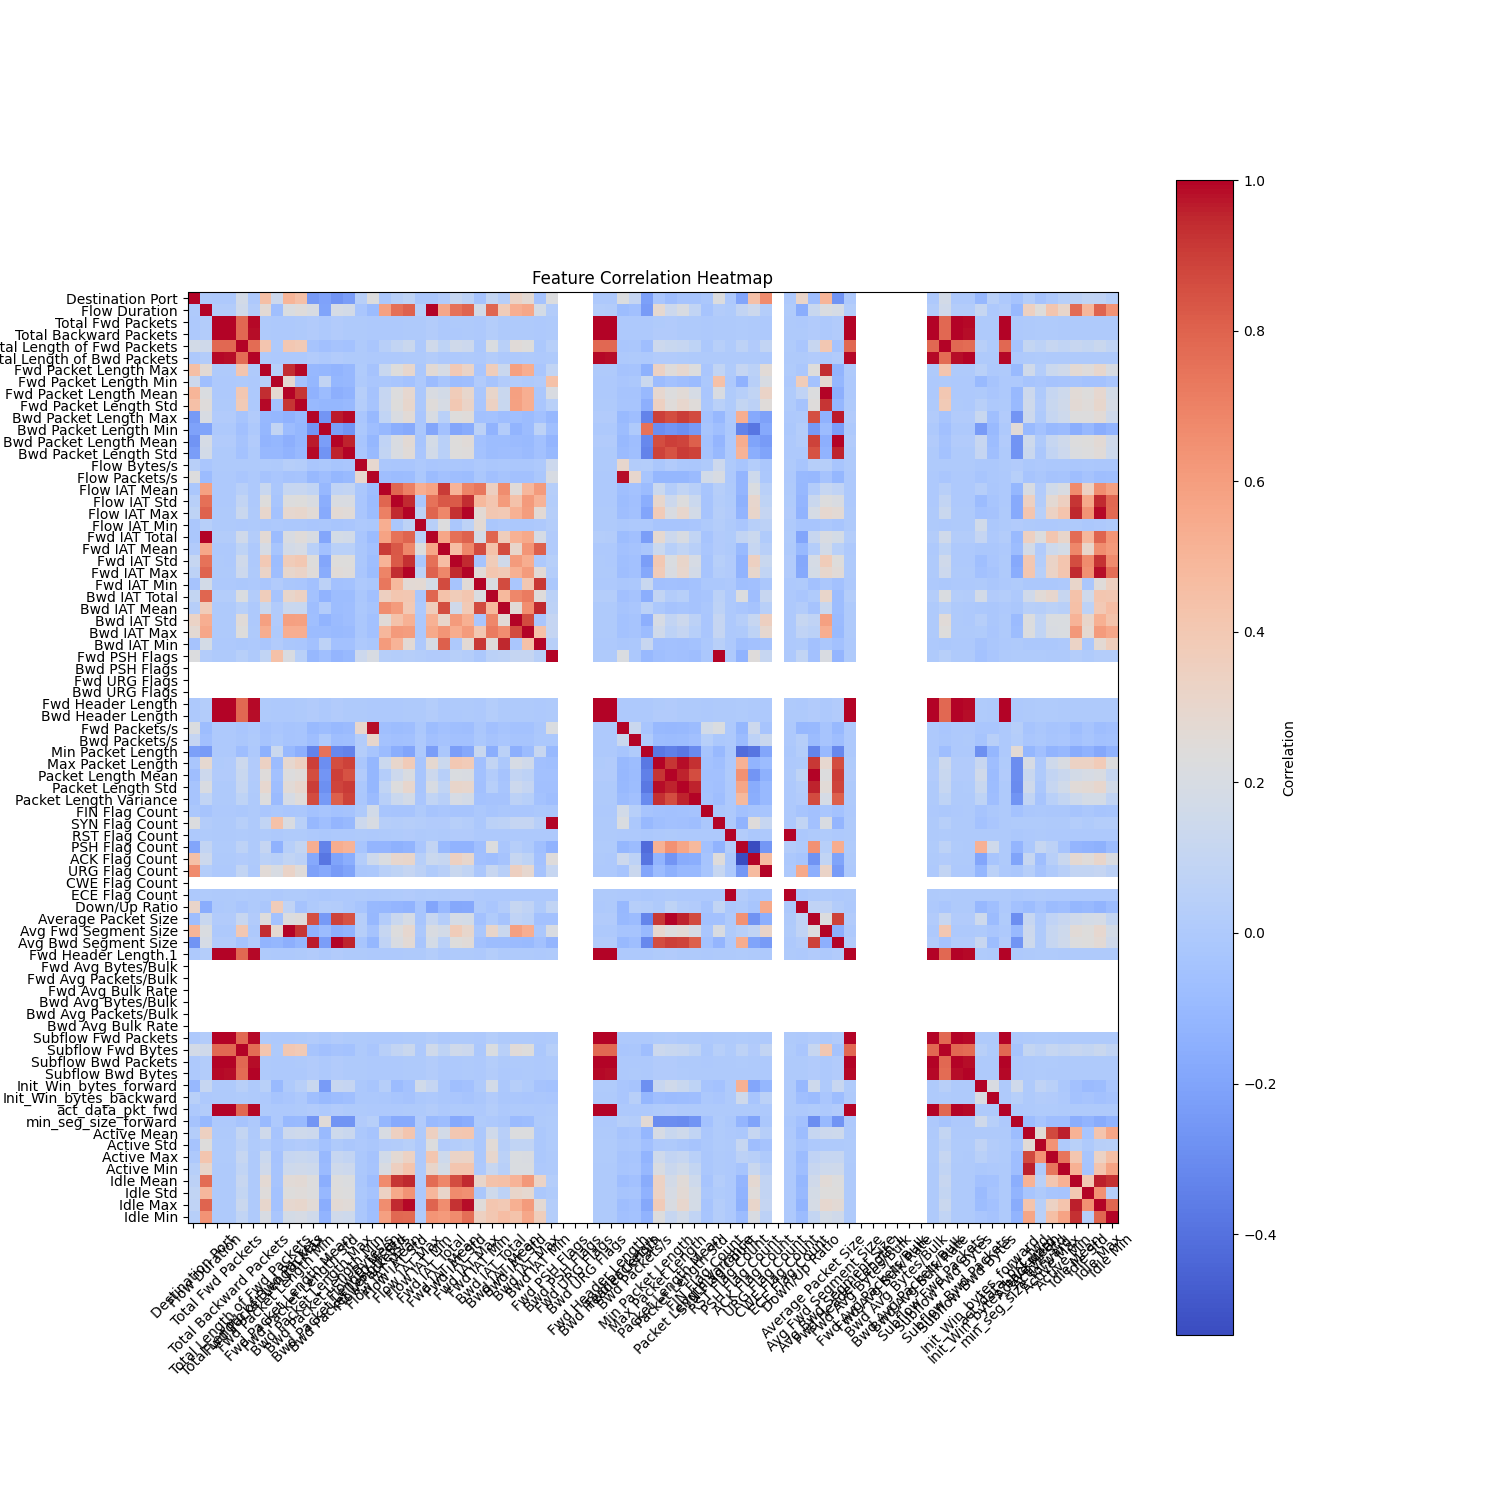

In [39]:
correlation_analysis(clean_inf_nan(dataframe),False)

#### Correlation Analysis (Without Constant Columns)

Number of columns: 63


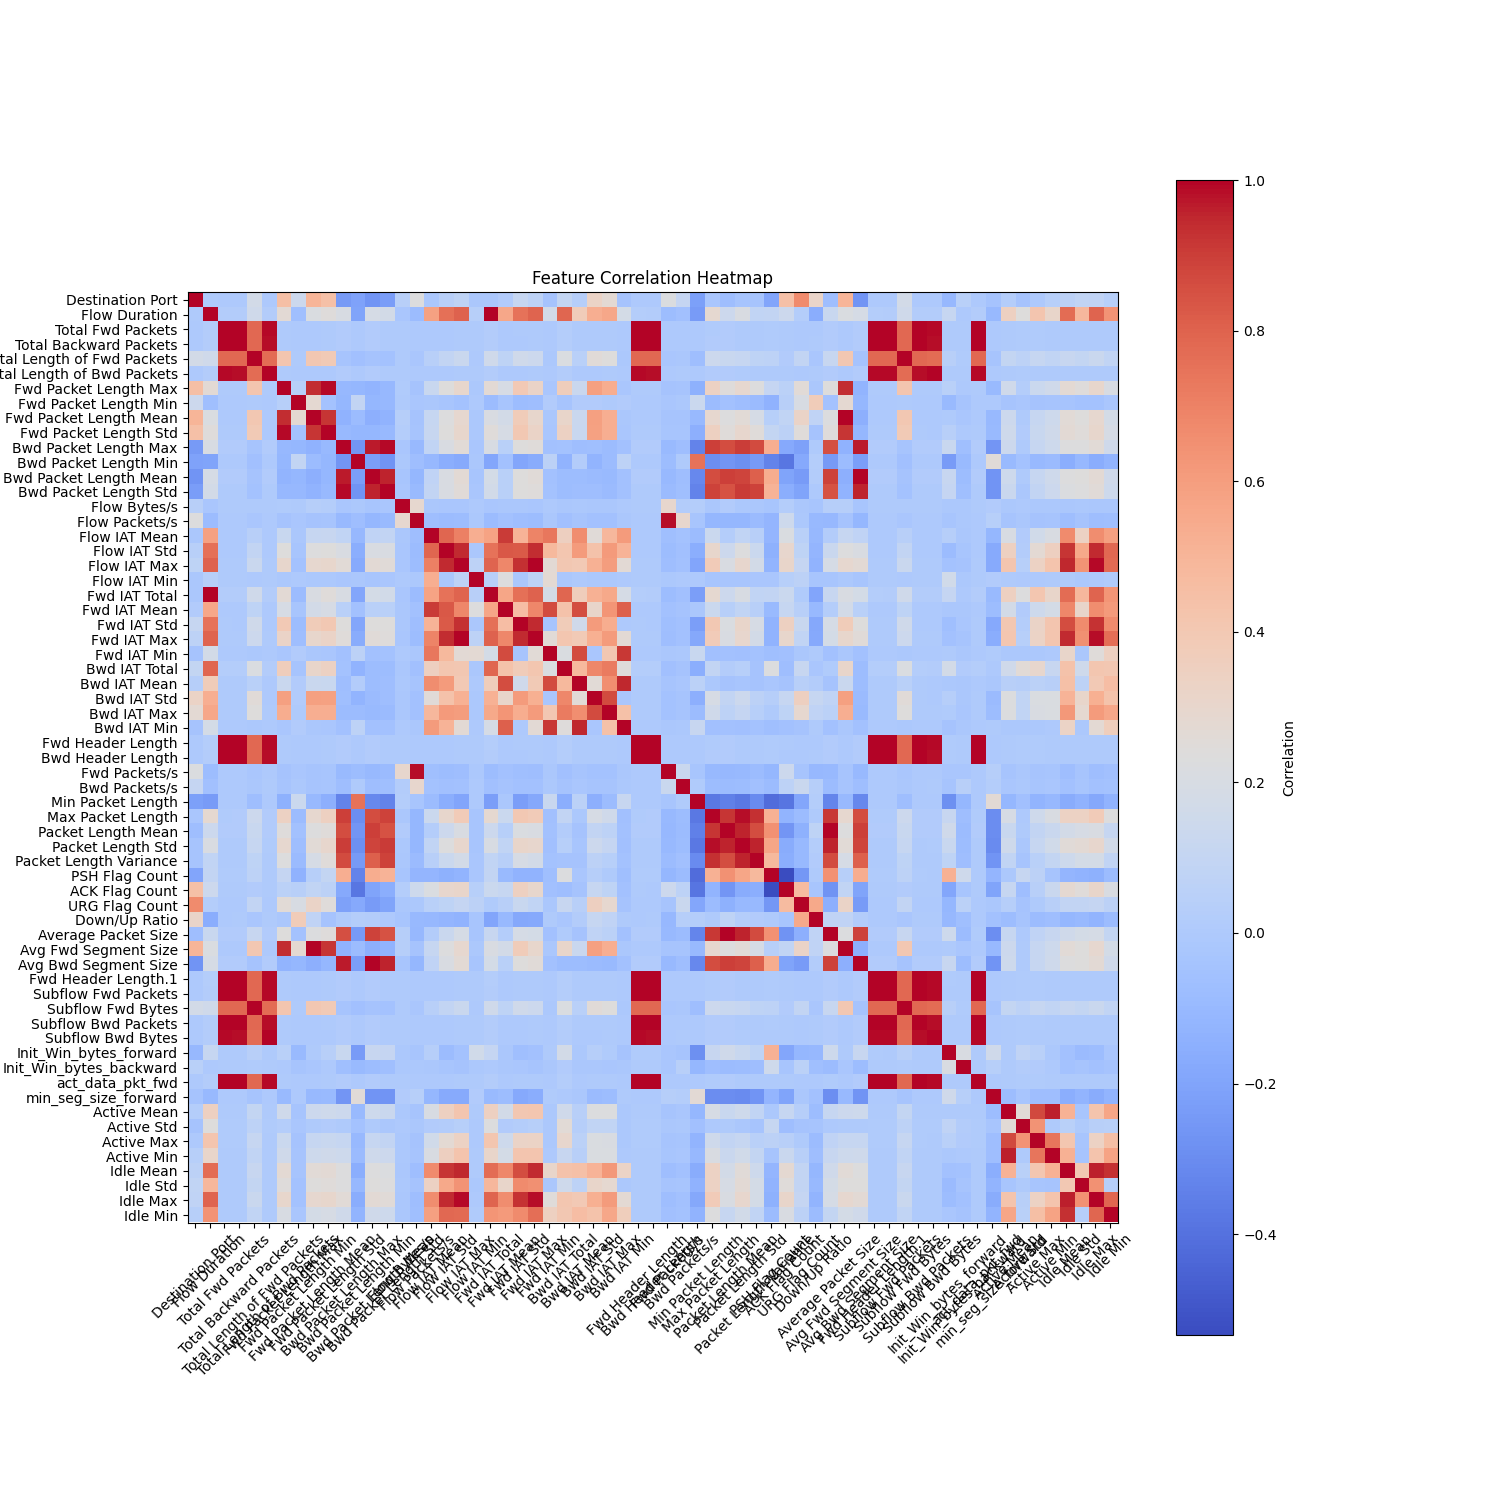

Correlation Matrix:
                             Destination Port  Flow Duration  \
Destination Port                     1.000000      -0.000697   
Flow Duration                       -0.000697       1.000000   
Total Fwd Packets                   -0.003982       0.022553   
Total Backward Packets              -0.003253       0.021559   
Total Length of Fwd Packets          0.176785       0.159056   
...                                       ...            ...   
Active Min                           0.037315       0.309104   
Idle Mean                            0.063939       0.770154   
Idle Std                             0.086691       0.485665   
Idle Max                             0.080183       0.793758   
Idle Min                             0.035511       0.638253   

                             Total Fwd Packets  Total Backward Packets  \
Destination Port                     -0.003982               -0.003253   
Flow Duration                         0.022553                0

In [40]:
correlation_analysis(clean_const_threshold(clean_inf_nan(dataframe), 0.95))

## Cleaning Data

As discussed previously, the following steps will be conducted to clean the initial dataset:

### 1. Removal of columns with `Nan`, `Null` or `Inf` values

In [41]:
clean_dataframe = clean_inf_nan(dataframe)

### 2. Removal of constant columns (where row values have a combined constancy threshold of 0.95%)

Rows that are highly constant will likely hold little predictive influence on the model while it is being trained. 

It will simply increase computation time and complexity. __As such, Columns that are > `0.95%` Constant will be removed.__

In [42]:
clean_dataframe = clean_const_threshold(clean_dataframe, 0.95)
print(f"Original number of columns: {len(dataframe.columns.tolist())}"
      f"Reduced Number of columns: {len(clean_dataframe.columns.tolist())}"
     )
print("Reduced Dataframe:")
summarize_columns(clean_dataframe)

Original number of columns: 79Reduced Number of columns: 64
Reduced Dataframe:


Column DataType  Min          Max        StdDev  \
0              Destination Port    int64  0.0      65532.0  1.914270e+04   
1                 Flow Duration    int64 -1.0  119999993.0  3.176590e+07   
2             Total Fwd Packets    int64  1.0     200755.0  7.449952e+02   
3        Total Backward Packets    int64  0.0     270686.0  9.898378e+02   
4   Total Length of Fwd Packets    int64  0.0    1197199.0  5.759463e+03   
..                          ...      ...  ...          ...           ...   
59                    Idle Mean  float64  0.0  120000000.0  1.886049e+07   
60                     Idle Std  float64  0.0   72600000.0  9.861617e+06   
61                     Idle Max    int64  0.0  120000000.0  2.257039e+07   
62                     Idle Min    int64  0.0  120000000.0  1.730592e+07   
63                        Class   object  NaN          NaN           NaN   

    Constancy  
0    0.398219  
1    0.012310  
2    0.251167  
3    0.219758  
4    0.143018  
..        ...  
59   0.726496  
60   0.898288  
61   0.726496  
62   0.726496  
63   0.671655  

[64 rows x 6 columns]

| Column                   | DataType | Constancy | High Constancy?       | Explanation                                                                                       |
|--------------------------|----------|-----------|-----------------------|-------------------------------------------------------------------------------------------------|
| Destination Port         | int64    | 0.398     | No                    | Values vary significantly; informative feature.                                                |
| Flow Duration           | int64    | 0.012     | No                    | Highly variable duration, useful for modeling.                                                 |
| Total Fwd Packets       | int64    | 0.251     | No                    | Packet counts vary; important feature.                                                        |
| Total Backward Packets  | int64    | 0.220     | No                    | Variable backward traffic counts.                                                             |
| Total Length of Fwd Packets | int64 | 0.143     | No                    | Large variation; informative.                                                                  |
| Total Length of Bwd Packets | int64 | 0.247     | No                    | Highly variable, informative.                                                                  |
| Fwd Packet Length Max   | int64    | 0.236     | No                    | Varies; informative for traffic characterization.                                             |
| Fwd Packet Length Min   | int64    | 0.450     | No                    | Somewhat stable but not constant.                                                              |
| Fwd Packet Length Mean  | float64  | 0.227     | No                    | Varies; useful summary statistic.                                                              |
| Fwd Packet Length Std   | float64  | 0.577     | No                    | Moderate constancy but still variable enough.                                                  |
| Bwd Packet Length Max   | int64    | 0.247     | No                    | Varies significantly.                                                                          |
| Bwd Packet Length Min   | int64    | 0.603     | No                    | Moderately constant but still variable.                                                       |
| Bwd Packet Length Mean  | float64  | 0.247     | No                    | Variable backward packet length.                                                               |
| Bwd Packet Length Std   | float64  | 0.613     | No                    | Some constancy but informative.                                                                |
| Flow Bytes/s            | float64  | 0.059     | No                    | Highly variable; informative.                                                                  |
| Flow Packets/s          | float64  | 0.012     | No                    | Very variable; valuable feature.                                                               |
| Flow IAT Mean           | float64  | 0.012     | No                    | Highly variable; important for timing patterns.                                               |
| Flow IAT Std            | float64  | 0.201     | No                    | Variable; useful timing info.                                                                   |
| Flow IAT Max            | int64    | 0.039     | No                    | Highly variable.                                                                               |
| Flow IAT Min            | int64    | 0.217     | No                    | Variable.                                                                                      |
| Fwd IAT Total           | int64    | 0.191     | No                    | Variable.                                                                                      |
| Fwd IAT Mean            | float64  | 0.191     | No                    | Variable.                                                                                      |
| Fwd IAT Std             | float64  | 0.441     | No                    | Moderate constancy but still variable.                                                        |
| Fwd IAT Max             | int64    | 0.191     | No                    | Variable.                                                                                      |
| Fwd IAT Min             | int64    | 0.204     | No                    | Variable.                                                                                      |
| Bwd IAT Total           | int64    | 0.370     | No                    | Variable.                                                                                      |
| Bwd IAT Mean            | float64  | 0.370     | No                    | Variable.                                                                                      |
| Bwd IAT Std             | float64  | 0.590     | No                    | Somewhat constant but still useful.                                                           |
| Bwd IAT Max             | int64    | 0.370     | No                    | Variable.                                                                                      |
| Bwd IAT Min             | int64    | 0.377     | No                    | Variable.                                                                                      |
| Fwd PSH Flags           | int64    | 0.962     | No                    | Very high constancy but slightly below 0.95 cutoff, borderline.                               |
| Bwd PSH Flags           | int64    | 1.000     | Yes                   | Constant zero; no variability, drop it.                                                       |
| Fwd URG Flags           | int64    | 1.000     | Yes                   | Constant zero; drop it.                                                                        |
| Bwd URG Flags           | int64    | 1.000     | Yes                   | Constant zero; drop it.                                                                        |
| Fwd Header Length       | int64    | 0.154     | No                    | Variable; informative feature.                                                                |
| Bwd Header Length       | int64    | 0.195     | No                    | Variable; useful feature.                                                                     |
| Fwd Packets/s           | float64  | 0.011     | No                    | Highly variable.                                                                              |
| Bwd Packets/s           | float64  | 0.195     | No                    | Variable.                                                                                    |
| Min Packet Length       | int64    | 0.460     | No                    | Variable minimum packet length.                                                               |
| Max Packet Length       | int64    | 0.237     | No                    | Variable.                                                                                    |
| Packet Length Mean      | float64  | 0.224     | No                    | Variable.                                                                                    |
| Packet Length Std       | float64  | 0.302     | No                    | Variable.                                                                                    |
| Packet Length Variance  | float64  | 0.302     | No                    | Variable.                                                                                    |
| FIN Flag Count          | int64    | 0.994     | Yes                   | Nearly constant; likely uninformative.                                                       |
| SYN Flag Count          | int64    | 0.962     | No                    | High constancy but just below 0.95 cutoff, borderline.                                      |
| RST Flag Count          | int64    | 1.000     | Yes                   | Constant; drop.                                                                             |
| PSH Flag Count          | int64    | 0.698     | No                    | Variable; keep.                                                                             |
| ACK Flag Count          | int64    | 0.595     | No                    | Variable; keep.                                                                             |
| URG Flag Count          | int64    | 0.871     | No                    | High constancy but below threshold, borderline keep.                                        |
| CWE Flag Count          | int64    | 1.000     | Yes                   | Constant zero; drop.                                                                        |
| ECE Flag Count          | int64    | 1.000     | Yes                   | Constant; drop.                                                                             |
| Down/Up Ratio           | int64    | 0.503     | No                    | Variable; keep.                                                                             |
| Average Packet Size     | float64  | 0.066     | No                    | Variable; keep.                                                                             |
| Avg Fwd Segment Size    | float64  | 0.227     | No                    | Variable; keep.                                                                             |
| Avg Bwd Segment Size    | float64  | 0.247     | No                    | Variable; keep.                                                                             |
| Fwd Header Length.1     | int64    | 0.154     | No                    | Variable; keep.                                                                             |
| Fwd Avg Bytes/Bulk      | int64    | 1.000     | Yes                   | Constant zero; drop.                                                                        |
| Fwd Avg Packets/Bulk    | int64    | 1.000     | Yes                   | Constant zero; drop.                                                                        |
| Fwd Avg Bulk Rate       | int64    | 1.000     | Yes                   | Constant zero; drop.                                                                        |
| Bwd Avg Bytes/Bulk      | int64    | 1.000     | Yes                   | Constant zero; drop.                                                                        |
| Bwd Avg Packets/Bulk    | int64    | 1.000     | Yes                   | Constant zero; drop.                                                                        |
| Bwd Avg Bulk Rate       | int64    | 1.000     | Yes                   | Constant zero; drop.                                                                        |
| Subflow Fwd Packets     | int64    | 0.251     | No                    | Variable; keep.                                                                             |
| Subflow Fwd Bytes       | int64    | 0.143     | No                    | Variable; keep.                                                                             |
| Subflow Bwd Packets     | int64    | 0.220     | No                    | Variable; keep.                                                                             |
| Subflow Bwd Bytes       | int64    | 0.247     | No                    | Variable; keep.                                                                             |
| Init_Win_bytes_forward  | int64    | 0.290     | No                    | Variable; keep.                                                                             |
| Init_Win_bytes_backward | int64    | 0.481     | No                    | Variable; keep.                                                                             |
| act_data_pkt_fwd        | int64    | 0.244     | No                    | Variable; keep.                                                                             |
| min_seg_size_forward    | int64    | 0.738     | No                    | Somewhat high constancy but below threshold, keep.                                          |
| Active Mean             | float64  | 0.727     | No                    | Somewhat high constancy but below threshold, keep.                                          |
| Active Std              | float64  | 0.941     | No                    | Very high constancy but below threshold, borderline keep.                                  |
| Active Max              | int64    | 0.727     | No                    | Somewhat high constancy but below threshold, keep.                                          |
| Active Min              | int64    | 0.727     | No                    | Somewhat high constancy but below threshold, keep.                                          |
| Idle Mean               | float64  | 0.726     | No                    | Somewhat high constancy but below threshold, keep.                                          |
| Idle Std                | float64  | 0.898     | No                    | High constancy but below threshold, borderline keep.                                       |
| Idle Max                | int64    | 0.726     | No                    | Somewhat high constancy but below threshold, keep.                                          |
| Idle Min                | int64    | 0.726     | No                    | Somewhat high constancy but below threshold, keep.                                          |
| Class                   | object   | 0.672     | No                    | Target label; variable and important.                                                      |


#### Feature Selection - Dropping based on Constancy - Observations

It makes sense that all fully constant features are flags -  many network flows do not use certain TCP flags, especially those related to rarely used control bits like URG or CWE, resulting in zero values throughout the dataset. 

TCP flags like SYN, FIN, RST, PSH, ACK, and URG indicate specific control signals in packet transmission—for example, SYN initiates a connection, FIN signals termination, and RST resets a connection. Since some of these flags occur only in particular network events, features representing flags that are never or almost never set end up being constant and provide little to no information for modeling.

As such, feature selection selection based off of constancy has reduced the number of columns from 79 to 64. 

### 3. Culling columns based off of correlation 

For the purpose of this task, a correlation threshold of __`95%`__ was selected as the cuttoff.

In [43]:
threshold = 0.95 # Correlation threshold
clean_dataframe = clean_highly_correlated(clean_dataframe, threshold)

In [44]:
correlation_dataframe = summarize_column_correlations(clean_const_threshold(clean_inf_nan(dataframe), 0.95))
correlation_dataframe[correlation_dataframe["Correlation"] > 0.95]

Column_1                     Column_2  Correlation
80          Flow Duration                Fwd IAT Total     0.997609
123     Total Fwd Packets       Total Backward Packets     0.998729
125     Total Fwd Packets  Total Length of Bwd Packets     0.993767
150     Total Fwd Packets            Fwd Header Length     0.999710
151     Total Fwd Packets            Bwd Header Length     0.998110
...                   ...                          ...          ...
1862  Subflow Bwd Packets            Subflow Bwd Bytes     0.987363
1865  Subflow Bwd Packets             act_data_pkt_fwd     0.997446
1877    Subflow Bwd Bytes             act_data_pkt_fwd     0.993828
1927          Active Mean                   Active Min     0.961824
1948            Idle Mean                     Idle Max     0.958819

[66 rows x 3 columns]

| Feature 1                 | Feature 2                 | Corr.   | Drop One? | Rationale                                                                                 |
|---------------------------|---------------------------|---------|-----------|--------------------------------------------------------------------------------------------|
| Flow Duration             | Fwd IAT Total             | 0.998   | Yes       | Fwd IAT Total is a subset of Flow Duration. Keep only one.                                 |
| Total Fwd Packets         | Subflow Fwd Packets       | 1.000   | Yes       | Exact duplication. Drop one.                                                               |
| Total Fwd Packets         | Fwd Header Length         | 0.999   | Yes       | Fwd Header Length = packets × header size. One can be inferred.                           |
| Total Backward Packets    | Subflow Bwd Packets       | 1.000   | Yes       | Duplicate. Keep only one.                                                                  |
| Fwd Header Length         | Fwd Header Length.1       | 1.000   | Yes       | Redundant columns. Same values under two names.                                            |
| Total Length of Fwd Pkts  | Subflow Fwd Bytes         | 1.000   | Yes       | Represent the same bytes sent forward. Keep one.                                           |
| Total Length of Bwd Pkts  | Subflow Bwd Bytes         | 1.000   | Yes       | Represent the same backward bytes. Redundant.                                              |
| Fwd Packet Len Mean       | Avg Fwd Segment Size      | 1.000   | Yes       | Same distribution over different naming.                                                   |
| Bwd Packet Len Mean       | Avg Bwd Segment Size      | 1.000   | Yes       | Same concept; one can be removed.                                                         |
| Packet Len Mean           | Average Packet Size       | 0.999   | Yes       | Effectively the same. Drop one.                                                            |
| Packet Len Std            | Packet Len Variance       | 0.952   | Maybe      | One derived from the other (std² = var). Depends on modeling method.                      |
| Fwd IAT Max               | Flow IAT Max              | 0.995   | Maybe      | Strong overlap; if both directions modeled separately, maybe keep both.                   |
| SYN Flag Count            | Fwd PSH Flags             | 0.962   | Maybe      | Different flag types, but strong correlation implies redundancy in some traffic.           |
| Subflow Fwd Pkts          | act_data_pkt_fwd          | 0.999   | Yes       | Highly redundant; likely differ only slightly. Drop one.                                   |
| Idle Mean                 | Idle Max                  | 0.959   | Maybe      | Max contributes to mean but not always representative. Can keep both for now.              |
| Flow Packets/s            | Fwd Packets/s             | 0.983   | Maybe      | Redundant unless analyzing direction-specific performance.                                 |
| RST Flag Count            | ECE Flag Count            | 0.999   | Yes       | Fully redundant. One can be removed if not modeling rare TCP behaviors.                    |
| Max Packet Length         | Packet Length Std         | 0.986   | Maybe      | Max influences stddev but offers extreme-case info. Use case dependent.                   |

#### Feature Selection - Dropping based on Correlation - Observations

Many of these features are highly correlated as they arise from duplicate data (Total Fwd Packets & Subflow Fwd Packets), are a subset of other features (Flow Duration & Fwd IAT Total) or are simply derived from other features. As such, many of these features were culled to avoid redundancy and biasing. Culling was conducted based off of significance, relevance, and failing all else, the feature with the shorter column name was selected. As such, the number of features was further reduced to 38. (39 including the Class Column)

##### Verifying with a Correlation Heatmap:


In [45]:
fully_cleaned_dataframe = clean_const_threshold(clean_highly_correlated(clean_inf_nan(dataframe),0.95),0.95)

Number of columns: 38


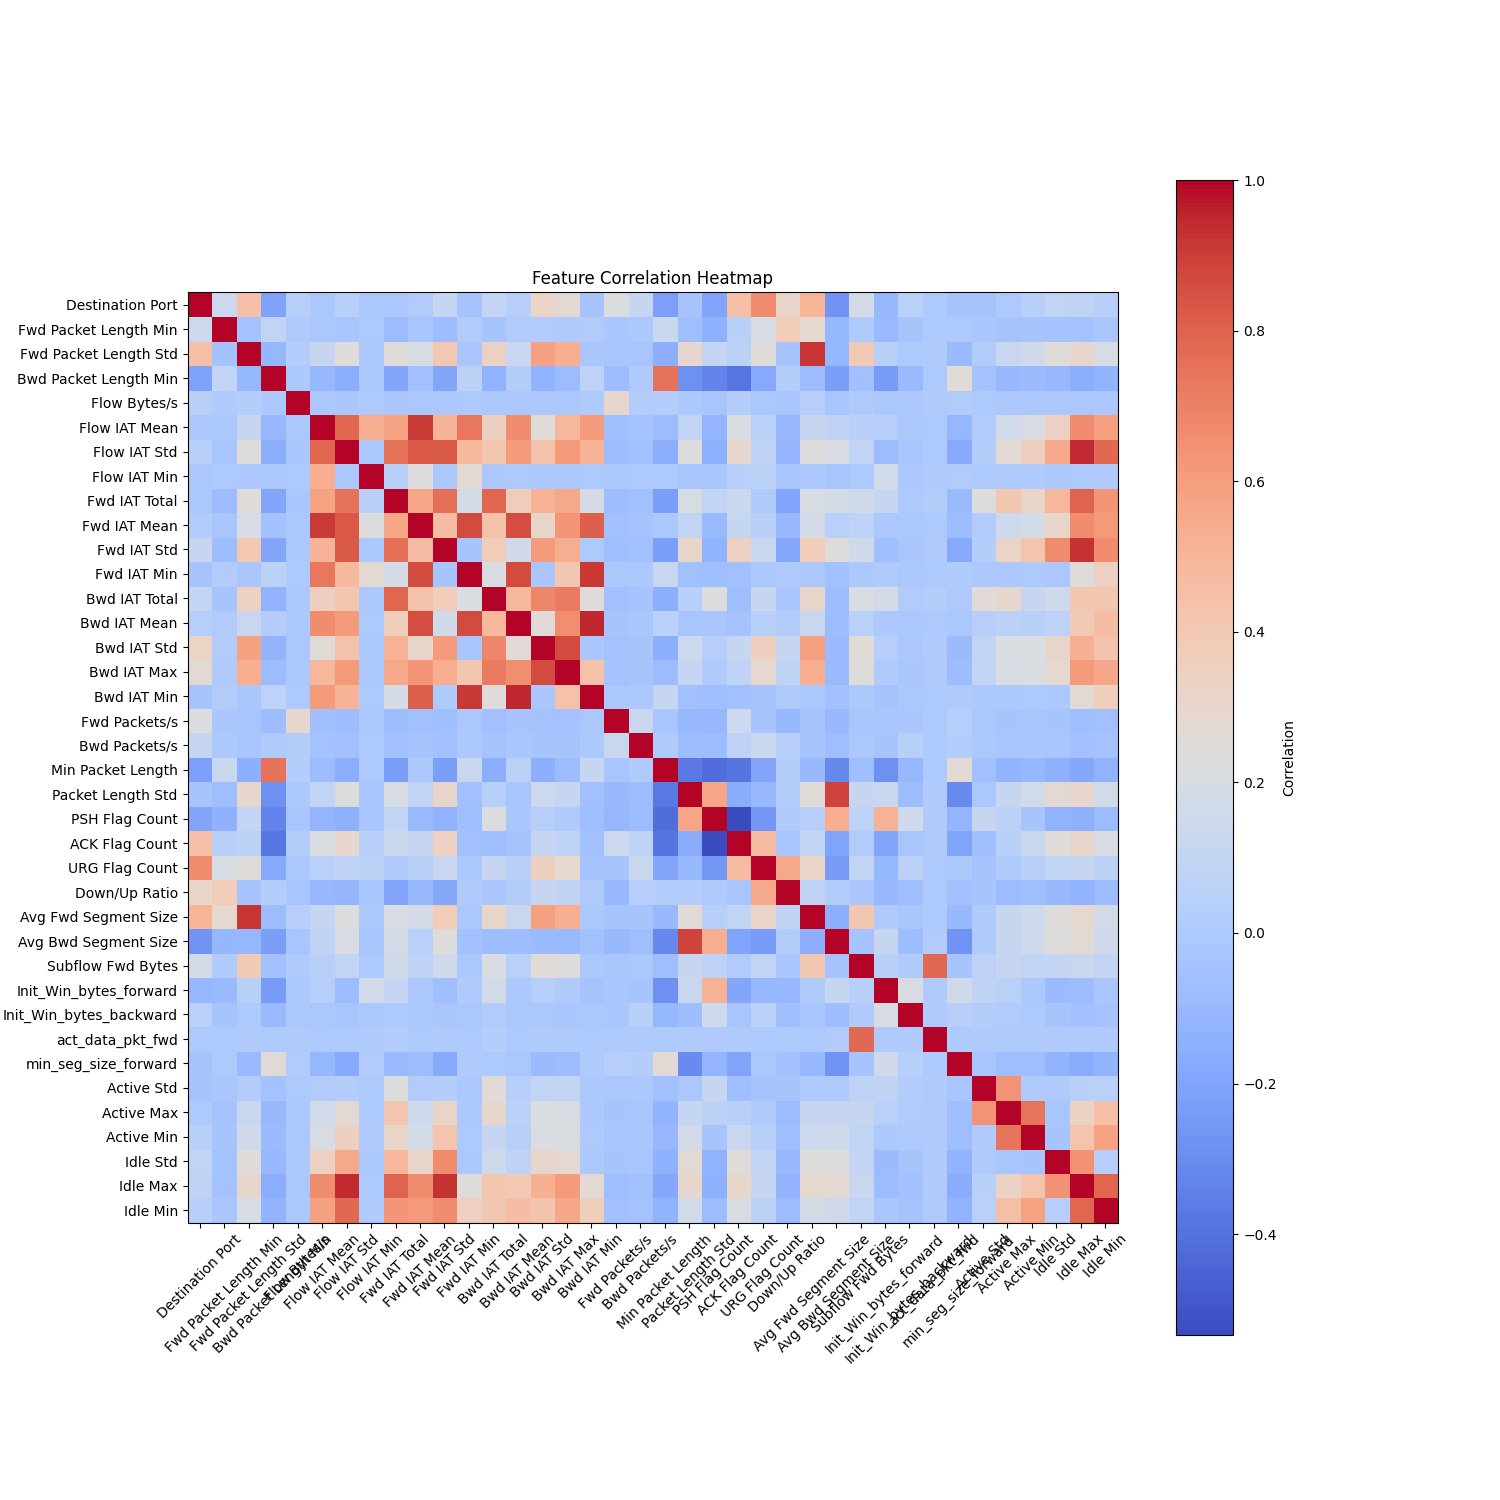

In [46]:
correlation_analysis(fully_cleaned_dataframe, False)

### General Cleaning Function:

In [47]:
def initial_column_selection(dataframe, threshold):
    return clean_inf_nan(clean_const_threshold(clean_highly_correlated(dataframe,threshold),threshold)).columns.tolist()
def reduce_to_columns(dataframe, columns):
    return clean_inf_nan(dataframe[columns].copy())


## Splitting Data:

For the ML, it is prudent to split the data into Training, Validation, and Testing Datasets.

The purposes of each are as detailed below:

#### Training Dataset:
##### Proportion of Original Dataset: `70%`
Used to fit the model and learn patterns from the data.

#### Validation Dataset:
##### Proportion of Original Dataset: `15%`
Used to tune hyperparameters and monitor performance to avoid overfitting.

#### Testing Dataset:
##### Proportion of Original Dataset: `15%`
Used once at the end to provide an unbiased estimate of the model’s performance.

### Splitting Data for ML

For the purposes of the data to be split, the only alterations made will be cleaning NaN and Inf as previously discussed.

Correlation / Const based reduction can be performed on the training data, not the test / validation data to ensure data integrity is maintained

In [48]:
data_to_split = clean_inf_nan(dataframe)

label_column = "Class"
training_split_ratio = 0.7 # Percentage of total dataset to be used for training
validation_split_ratio = 0.15 # Percentage of total dataset to be used for validation
test_split_ratio = 0.15 # Percentage of total dataset to be used for testing
random_state = 1 # Random seed for splitting

(
    training_dataframe, training_labels, 
    validation_dataframe, validation_labels, 
    test_dataframe, test_labels
) = perform_data_split(
    dataframe, label_column, 
    training_split_ratio, validation_split_ratio, 
    test_split_ratio, random_state
)

print("Training set shape:", training_dataframe.shape, training_labels.shape)
print("Validation set shape:", validation_dataframe.shape, validation_labels.shape)
print("Testing set shape:", test_dataframe.shape, test_labels.shape)

Training set shape: (831833, 78) (831833,)
Validation set shape: (178250, 78) (178250,)
Testing set shape: (178250, 78) (178250,)


## Feature Selection and Dimensionality Reduction:

As discussed earlier, the approach taken for this task is an exploratory one due to lack of prior experience with machine learning. As such, there will be 3 sepearate pipelines for feature selection, ranking, and dimensionality reduction. This is in order to identify the best solution and approach.

However, before splitting into these 3 pipelines, the following steps will be conducted:

#### 1. Drop columns with a variance less then `0.95%`accross its values
_Rows that are highly constant will likely hold little predictive influence on the model while it is being trained_


#### 2. Drop columns with high correlation
_Such columns are redundant and do not add any predictive power, they simply add dimensionality which increases computation time and complexity and may bias the model_

#### __Note:__ These steps were performed previously, for a deeper explanation, see prior code. 
As discussed earlier, the reduction of these columns aligns with expectations regarding the different features within the dataset, reducing the dataset from 79 columns to 38.

### Approach to Dimensionality Reduction:
Dimensionality reduction for training of model will be done in the following 3 parralel pipeline. 

##### __Pipeline A:__ Train models on PCA-Reduced Features
##### __Pipeline B:__ Train models on ANOVA Features and Random Forest Features, where only features with a p-score > 0.05 are utilised
Note: ANOVA was trialed, then discarded, the dataset contains classes with extremely unequal occurrences. 
ANOVA assumes roughly equal group sizes and variances. If you wish to see this, there is still the methods used to raank features using ANOVA in the code above. 
However, the imbalance was caused the ranking to be dominated by the largest classes, making it unreliable for detecting meaningful differences in the rarer classes (SQL, XSS)

Feature ranking and selection with Random Forest was judged on importance aand p score.

The p-score is important because it quantifies the likelihood that a feature’s observed importance could have occurred by chance, providing a measure of statistical significance. Permutation testing on the Random Forest was therefore used to generate p-scores, ensuring that only features with p-values below 0.1 are considered reliably predictive rather than artifacts of random variation.

##### __Pipeline C:__ apply PCA to Random Forest Features (Maintains interpretability and reduces redundancy)
Pipeline C combines the approaches of Pipelines A and B in hope to combine their appeals, to maintain interpretability and reduce any potential redundancy remaining after the Random Forest feature selection and ranking. 

#### Notes on the application of PCA:
Where PCA was applied, instead of applying some arbitrary number to specify how many components there would be, I instead opted to have the number of components to be selected such that it would explain ~95% of variance. This ensures that the dimensionality reduction will be adapted to the complexity of the given data set as opposed to a guess, preserving most of the variability to try and prevent overfitting. This is why there is a different number of components preserved from pipelines A and C. 

### Notes on Feature Ranking:

Feature Ranking and selection, seen most prevelantly in Pipeline B, was conducted with Random Forest as opposed to Decision Trees.

By using Random Forests, I am instead using a large quantity of decision trees, providing a more robust, stable importance estimates by averaging over many trees, reducing the noise of any single decision tree.

Furthermore, a permutation based approach to allow for significance of features to be determined, not just their percieved importance. 
Permutation importance measures how much a model’s performance decreases when a single feature’s values are randomly shuffled. 
Whether or not shuffling a feature degrades performance is an indicator of reliance and usefulness of a given feature, allowing this form of feature selection and ranking to reflect the contribution of the feature to a given model as opposed to how often it appears in the decision tree.

##### Steps to get training data to use for Feature Selection:


In [49]:
concat_training_dataframe = pd.concat([training_dataframe, training_labels], axis=1) # Combining back before culling is performed
initial_reduction_dataframe = clean_inf_nan(clean_const_threshold(clean_highly_correlated(concat_training_dataframe,0.95),0.95))

### PCA Methods

In [50]:
def pca_variance_threshold_save(dataframe: pd.DataFrame, class_column: str, variance_threshold: float = 0.95, pipeline: str = "pipelineA"):
    """
    Perform PCA on numeric columns, retain enough components to reach variance_threshold,
    save the transformed data to CSV, and save PCA and scaler objects.

    Parameters:
        dataframe (pd.DataFrame): Input DataFrame including features and label
        class_column (str): Name of the target column
        variance_threshold (float): Fraction of variance to retain
        csv_path (str): File path to save transformed PCA dataframe
        scaler_path (str): File path to save fitted scaler
        pca_path (str): File path to save fitted PCA model

    Returns:
        pca_dataframe (pd.DataFrame): PCA-transformed features
        pca (PCA object): Fitted PCA model
        scaler (StandardScaler): Fitted scaler
    """
    # Separate features and label
    features = dataframe.drop(columns=[class_column])
    numeric_features = features.select_dtypes(include='number')

    # Standardize features
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(numeric_features)

    # Fit PCA to retain desired variance
    pca = PCA(n_components=variance_threshold)
    pca_result = pca.fit_transform(scaled_data)

    # Build DataFrame
    pc_columns = [f"PC{i+1}" for i in range(pca_result.shape[1])]
    pca_dataframe = pd.DataFrame(pca_result, columns=pc_columns, index=dataframe.index)

    # Save CSV and models
    pca_dataframe.to_csv(f"{pipeline}_pca_transformed_{str(variance_threshold).split(".")[1]}.csv", index=False)
    joblib.dump(scaler, f"{pipeline}_pca_scaler_{str(variance_threshold).split(".")[1]}.pkl")
    joblib.dump(pca, f"{pipeline}_pca_{str(variance_threshold).split(".")[1]}.pkl")

    return pca_dataframe, pca, scaler

def transform_with_pca(dataframe, scaler, pca_model, label_column):
    # Separate features and labels
    labels= dataframe[label_column]
    dataset = dataframe.drop(columns=[label_column])
    
    # Keep only numeric columns
    #numeric_dataset = dataset.select_dtypes(include='number')
    # Scale
    dataset_scaled = scaler.transform(dataset)
    
    # PCA transform
    dataset_pca = pca_model.transform(dataset_scaled)
    
    return dataset_pca, labels

def pca_with_label(dataframe: pd.DataFrame, label_column: str, explained_variance_threshold: float = 0.95):
    """
    Apply PCA to numeric features of a DataFrame, excluding the label column,
    and automatically select the number of components to retain the given fraction of explained variance.

    Parameters:
        dataframe (pd.DataFrame): DataFrame containing features and label
        label_column (str): Name of the label column
        explained_variance_threshold (float): Fraction of variance to retain (0 < threshold <= 1)

    Returns:
        pca_dataframe (pd.DataFrame): PCA-transformed features
        labels (pd.Series): Original label column
        pca (PCA object): The fitted PCA model
    """
    # Separate features and label
    labels = dataframe[label_column]
    features = dataframe.drop(columns=[label_column])

    # Keep only numeric features
    numeric_features = features.select_dtypes(include='number')

    # Standardize the features
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(numeric_features)

    # Fit PCA
    pca = PCA(n_components=explained_variance_threshold)
    pca_result = pca.fit_transform(scaled_data)

    # Build a DataFrame with principal components
    pc_columns = [f"PC{i+1}" for i in range(pca_result.shape[1])]
    pca_dataframe = pd.DataFrame(pca_result, columns=pc_columns, index=dataframe.index)

    return pca_dataframe, labels, pca

def pca_with_label_plot(dataframe: pd.DataFrame, label_column: str, explained_variance_threshold: float = 0.95):
    """
    Apply PCA to numeric features of a DataFrame, excluding the label column,
    automatically select the number of components to retain the given fraction of explained variance,
    and plot the cumulative explained variance with the number of components annotated.

    Parameters:
        dataframe (pd.DataFrame): DataFrame containing features and label
        label_column (str): Name of the label column
        explained_variance_threshold (float): Fraction of variance to retain (0 < threshold <= 1)

    Returns:
        pca_dataframe (pd.DataFrame): PCA-transformed features
        labels (pd.Series): Original label column
        pca (PCA object): The fitted PCA model
    """
    # Separate features and label
    labels = dataframe[label_column]
    features = dataframe.drop(columns=[label_column])

    # Keep only numeric features
    numeric_features = features.select_dtypes(include='number')

    # Standardize the features
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(numeric_features)

    # Fit PCA
    pca = PCA(n_components=explained_variance_threshold)
    pca_result = pca.fit_transform(scaled_data)

    # Build a DataFrame with principal components
    pc_columns = [f"PC{i+1}" for i in range(pca_result.shape[1])]
    pca_dataframe = pd.DataFrame(pca_result, columns=pc_columns, index=dataframe.index)

    # Plot cumulative explained variance
    cum_var = np.cumsum(pca.explained_variance_ratio_)
    n_components = len(cum_var)
    plt.figure(figsize=(8,5))
    plt.plot(range(1, n_components+1), cum_var, marker='o', color='skyblue')
    plt.axhline(y=explained_variance_threshold, color='r', linestyle='--', label=f'Threshold = {explained_variance_threshold}')
    
    # Annotate number of components that meet threshold
    comps_needed = np.argmax(cum_var >= explained_variance_threshold) + 1
    plt.scatter(comps_needed, cum_var[comps_needed-1], color='red', zorder=5)
    plt.text(comps_needed, cum_var[comps_needed-1], f'  {comps_needed} PCs', color='red', va='bottom')

    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('PCA Cumulative Explained Variance')
    plt.xticks(range(1, n_components+1))
    plt.grid(alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

    return pca_dataframe, labels, pca

def pca_reconstruction_metrics(data: pd.DataFrame, n_components: int):
    # Fit PCA
    pca = PCA(n_components=n_components)
    data_pca = pca.fit_transform(data)
    
    # Reconstruct from PCA
    data_reconstructed = pca.inverse_transform(data_pca)
    
    # Compute metrics
    r2 = r2_score(data, data_reconstructed)
    mse = mean_squared_error(data, data_reconstructed)
    evr = pca.explained_variance_ratio_.sum()

    return {
        "r2_score": r2,
        "mse": mse,
        "explained_variance_ratio": evr
    }


### Pipeline A: PCA
__Warning:__ This takes a long time to do - hence the outputs are as a pkls so that the output can be imported instead of requiring the code below to be rerun for all instances.

In [ ]:
# Pipeline A PCA - This saves the PCAs to be reused.
pipelineA_dataframe, pipelineA_pca, pipelineA_scaler = pca_variance_threshold_save(initial_training_dataframe, "Class",0.95, "pipelineA")

#### Findings from Pipeline A:
The dimensionality reduction in Pipeline A further reduced the features from 38 columns to 19 components.

As discussed earlier, this number is not chosen arbitrarily - at 19 components, the PCA explains 95% of variance, preserving most of the variability to try and prevent overfitting.

Compared to the 21 features eventually selected for Pipeline B, Pipeline A will likely be less computationally expensive and may potentially capture relationships and patterns that Pipeline B may not.

In [51]:
pca_reconstruction_metrics(initial_reduction_dataframe.drop(columns=["Class"]), 19)

{'r2_score': 0.610612182512642,
 'mse': 190344470.53994966,
 'explained_variance_ratio': np.float64(0.9999980606588933)}

### Pipeline A: Accuracy of reconstructing the data from selected components

#### Explained Variance Ratio:

__Value:__ `0.999998 (≈ 99.9998%)`
Interpretation: Given how high the Explained Variance Ratio is, this indicates that the 19 components capture almost all the variance in the original data - indicating that the PCA is compressing the data without losing any substantial degree of meaningful information. This is a strong indication that the data is highly redundant or correlated, and PCA has effectively reduced dimensionality with minimal information loss.


#### Mean Squared Error (MSE)

__Value:__ `190,344,470.54`
Interpretation: This value reflects reflects total reconstruction error summed across all rows and features - thus considering the shear scale of this dataset, this is within acceptable bounds.


#### R² Score (Reconstruction R²)

__Value:__ `0.6106`

Value: 0.6106
Interpretation: This is considered moderate, however is to be expected taking into account the excellent explained variance in comparison with the large MSE.
This indicates that reconstruction accuracy is good, but not perfect, especially on a per-value basis. This also possibly indicates that the data has non-linear relationships, which may well be considering the nature of the data and the distinct types of attacks.

#### Reconstruction Conclusion: 
The quality of this reconstruction is acceptable, especially given that the task was prioritising explained variance for the dimensionality reduction in Pipeline A.

### Pipeline B: Combined Feature Selection (ANOVA and Random Forest) - __[P > 0.05]__

#### Random Forest: __[20 permutations - ~ P > 0.05]__

__Warning:__ This takes a long time to do - hence the output is saved as a CSV so that the output can be saved and imported instead of requiring the code below to be rerun for all instances.

In [ ]:
rf_results_sampled = run_rf_all_features_stratified(
    dataframe=initial_reduction_dataframe,
    class_column="Class",
    sample_fraction=0.5,   # Use 25% of the data
    n_estimators=50,
    n_permutations=50,
    random_state=1,
    output_csv="rf_all_features_5pct.csv"
)

In [52]:
random_forest_rankings = read_file("rf_all_features_25pct.csv")
relevant_features = random_forest_rankings.loc[random_forest_rankings["p-value"] < 0.1, "Feature"].tolist()
random_forest_rankings

Feature    Importance           Std  p-value
0          Destination Port  5.416821e-02  3.355194e-04     0.00
1               Fwd IAT Min  1.961575e-03  2.962930e-05     0.00
2              Flow IAT Min  6.526461e-04  2.262083e-05     0.00
3          act_data_pkt_fwd  5.764030e-04  2.760928e-05     0.00
4    Init_Win_bytes_forward  5.753927e-04  3.350753e-05     0.00
5   Init_Win_bytes_backward  5.087137e-04  2.135628e-05     0.00
6               Fwd IAT Std  1.796966e-04  1.767616e-05     0.00
7             Bwd Packets/s  8.641331e-05  1.224650e-05     0.00
8            URG Flag Count  4.404856e-05  5.253498e-06     0.00
9             Fwd IAT Total  4.007476e-05  8.890790e-06     0.00
10            Fwd Packets/s  2.936571e-05  5.834456e-06     0.00
11             Fwd IAT Mean  2.660425e-05  7.627508e-06     0.00
12             Flow IAT Std  2.586338e-05  5.192702e-06     0.00
13     Avg Fwd Segment Size  2.175487e-05  5.994376e-06     0.00
14            Flow IAT Mean  1.771372e-05  3.857954e-06     0.00
15     Avg Bwd Segment Size  1.400933e-05  4.536182e-06     0.00
16        Subflow Fwd Bytes  1.111317e-05  5.482100e-06     0.02
17    Fwd Packet Length Std  9.294651e-06  2.901636e-06     0.00
18              Bwd IAT Std  8.284362e-06  2.794116e-06     0.00
19        Packet Length Std  6.600549e-06  2.932737e-06     0.06
20              Bwd IAT Min  3.300274e-06  4.714678e-07     0.02
21              Bwd IAT Max  3.098217e-06  2.413440e-06     0.30
22     min_seg_size_forward  2.424691e-06  1.512061e-06     0.28
23             Bwd IAT Mean  4.714678e-07  1.168523e-06     0.86
24             Flow Bytes/s  1.347051e-07  6.599174e-07     0.96
25    Fwd Packet Length Min  0.000000e+00  0.000000e+00     1.00
26    Bwd Packet Length Min  0.000000e+00  0.000000e+00     1.00
27           PSH Flag Count  0.000000e+00  0.000000e+00     1.00
28            Bwd IAT Total  0.000000e+00  0.000000e+00     1.00
29        Min Packet Length  0.000000e+00  0.000000e+00     1.00
30           ACK Flag Count  0.000000e+00  0.000000e+00     1.00
31            Down/Up Ratio  0.000000e+00  0.000000e+00     1.00
32               Active Std  0.000000e+00  0.000000e+00     1.00
33               Active Max  0.000000e+00  0.000000e+00     1.00
34               Active Min  0.000000e+00  0.000000e+00     1.00
35                 Idle Std  0.000000e+00  0.000000e+00     1.00
36                 Idle Max  0.000000e+00  0.000000e+00     1.00
37                 Idle Min  0.000000e+00  0.000000e+00     1.00

### Pipeline B - Feature Selection, Ranking & Reduction Observations

#### Feature Importance and Significance from Permutation-Based Random Forests

| Feature                  | Importance        | Std Dev           | p-value | Interpretation |
|--------------------------|--------------------|--------------------|---------|----------------|
| Destination Port         | 5.42e-02           | 3.36e-04           | 0.0     | Highly informative; port usage differs between protocols and attack types. |
| Fwd IAT Min              | 1.96e-03           | 2.96e-05           | 0.0     | Indicates bursty traffic or timing anomalies. |
| Flow IAT Min             | 6.53e-04           | 2.26e-05           | 0.0     | Captures lower bound on flow timing — often variable in attacks. |
| act_data_pkt_fwd         | 5.76e-04           | 2.76e-05           | 0.0     | Correlates with actual payload delivery. |
| Init_Win_bytes_forward   | 5.75e-04           | 3.35e-05           | 0.0     | Initial TCP window size often varies between OS or tools. |
| Init_Win_bytes_backward  | 5.09e-04           | 2.14e-05           | 0.0     | Same as above, but on response side. |
| Fwd IAT Std              | 1.80e-04           | 1.77e-05           | 0.0     | Shows temporal burst variability in forward traffic. |
| Bwd Packets/s            | 8.64e-05           | 1.22e-05           | 0.0     | Low-level packet rate can expose abnormal sessions. |
| URG Flag Count           | 4.40e-05           | 5.25e-06           | 0.0     | Rarely set, but meaningful when it is. |
| Fwd IAT Total            | 4.01e-05           | 8.89e-06           | 0.0     | Cumulative delay in packet timings — valuable. |
| Fwd Packets/s            | 2.94e-05           | 5.83e-06           | 0.0     | Similar to Bwd Packets/s; packet frequency helps identify patterns. |
| Fwd IAT Mean             | 2.66e-05           | 7.63e-06           | 0.0     | Reinforces significance of flow timing. |
| Flow IAT Std             | 2.59e-05           | 5.19e-06           | 0.0     | Standard deviation in total flow time is informative. |
| Avg Fwd Segment Size     | 2.18e-05           | 5.99e-06           | 0.0     | May relate to specific application protocols. |
| Flow IAT Mean            | 1.77e-05           | 3.86e-06           | 0.0     | More timing features — reinforces traffic behavior clues. |
| Avg Bwd Segment Size     | 1.40e-05           | 4.54e-06           | 0.0     | Segment size on response traffic helps reveal structure. |
| Subflow Fwd Bytes        | 1.11e-05           | 5.48e-06           | 0.02    | Just above noise threshold; borderline useful. |
| Fwd Packet Length Std    | 9.29e-06           | 2.90e-06           | 0.0     | Size variation shows consistency or anomaly in flow. |
| Bwd IAT Std              | 8.28e-06           | 2.79e-06           | 0.0     | Adds complementary timing variance. |
| Packet Length Std        | 6.60e-06           | 2.93e-06           | 0.06    | Useful but borderline — still under p < 0.1 threshold. |
| Bwd IAT Min              | 3.30e-06           | 4.71e-07           | 0.02    | Very minor but significant temporal feature. |
| Bwd IAT Max              | 3.10e-06           | 2.41e-06           | 0.30    | Not significant enough to retain. |
| min_seg_size_forward     | 2.42e-06           | 1.51e-06           | 0.28    | Very weak; near noise. |
| Bwd IAT Mean             | 4.71e-07           | 1.17e-06           | 0.86    | Likely irrelevant. |
| Flow Bytes/s             | 1.35e-07           | 6.60e-07           | 0.96    | Variance too high — not reliable. |
| Fwd Packet Length Min    | 0.0                | 0.0                | 1.0     | Constant or uninformative. |
| Bwd Packet Length Min    | 0.0                | 0.0                | 1.0     | Same. |
| PSH Flag Count           | 0.0                | 0.0                | 1.0     | Likely unused. |
| Bwd IAT Total            | 0.0                | 0.0                | 1.0     | Redundant with other IATs. |
| Min Packet Length        | 0.0                | 0.0                | 1.0     | Not variable. |
| ACK Flag Count           | 0.0                | 0.0                | 1.0     | Ubiquitous — not discriminative. |
| Down/Up Ratio            | 0.0                | 0.0                | 1.0     | Largely constant but below 0.95% constancy tolerance. |
| Active Std               | 0.0                | 0.0                | 1.0     | Same across flows. |
| Active Max               | 0.0                | 0.0                | 1.0     | Not useful. |
| Active Min               | 0.0                | 0.0                | 1.0     | Same. |
| Idle Std                 | 0.0                | 0.0                | 1.0     | Likely unused or constant. |
| Idle Max                 | 0.0                | 0.0                | 1.0     | Same. |
| Idle Min                 | 0.0                | 0.0                | 1.0     | Same. |

---

#### Discussion
The use of p-values alongside feature importance in permutation-based Random Forest analysis justifies setting a principled threshold — in this case, retaining features with **p < 0.1**. 

This cut-off looks to select features both of high impact on model performance but also are statistically unlikely to have gained their importance by chance. 
        
Without the p-values, some features with very low importances might still be mistakenly retained due to noise, correlation, or redundancy. Instead, this approach provides confidence that retained features truly contribute to model discrimination and generalization. It also results in a leaner, more interpretable model by filtering out the constant or irrelevant features that traditional feature importance methods alone might not eliminate.

This reduces the amount of columns from `38` to `21` Columns.

Destination Port stands out with an importance order of magnitude higher than any other feature. This is highly intuitive, given that port numbers correlate to specific services and are thus good indicators of the nature of activity transpiring. 
Similarly, Fwd IAT Min, Flow IAT Min, and Fwd IAT Std are all related to inter-arrival times, capturing timing behavior within flows. These are known to vary significantly between normal traffic and potentially malicious activity, justifying high rankings.

The inclusion of features like Init_Win_bytes_forward and act_data_pkt_fwd is also expected — initial window size and the actual number of forward data packets often depend on the type of protocol or tool used, which varies when an attack is occuring.

Features like Fwd Packets/s, Bwd Packets/s, and Avg Fwd/Bwd Segment Size provide insight into rate and structure of data transfer, again aligning well with established network traffic signatures.

In comparison, features with a p-value of 1.0, such as PSH Flag Count, Min Packet Length, ACK Flag Count, and Idle Min, feature less variance, making their exclusion obvious. These results reinforce that while traditional importance scores (e.g., from decision trees) can highlight useful patterns, adding a significance test helps filter out noise, particularly for features that might rank non-zero purely by chance.

### Pipeline C: Combined Feature Selection (Random Forest) - __[P < 0.1]__ With PCA
__Warning:__ This takes a long time to do - hence the outputs are as a pkls so that the output can be imported instead of requiring the code below to be rerun for all instances.

In [ ]:
random_forest_rankings = read_file("rf_all_features_25pct.csv")
relevant_features = random_forest_rankings.loc[random_forest_rankings["p-value"] < 0.1, "Feature"].tolist()
reduced_dataframe = initial_reduction_dataframe[relevant_features + ["Class"]].copy() 

In [ ]:
# pipeline C PCA:
pipelineC_dataframe, pipelineC_pca, pipelineC_scaler = pca_variance_threshold_save(training_dataframe_b, "Class",0.95, "pipelineC")

#### Findings from Pipeline C:

The dimensionality reduction in Pipeline C further reduced the features from Pipeline B from 21 Features to 12 Components. 

As discussed earlier, this number is not chosen arbitrarily - at 12 components, the PCA explains 95% of variance, preserving most of the variability to try and prevent overfitting.

Compared to the 19 Components generated from Pipeline A, Pipeline C be less computationally expensive and less time intensive whilst still hopefully maintaining observance of the features likely most relevant, having also under taken initial feature ranking (see pipeline B).


In [57]:
pca_reconstruction_metrics(training_dataframe_b.drop(columns=["Class"]), 12)

{'r2_score': 0.6787335044675202,
 'mse': 8800558.321340853,
 'explained_variance_ratio': np.float64(0.9999998604863115)}

### Pipeline C: Accuracy of reconstructing the data from selected components

#### Explained Variance Ratio:

__Value:__ `0.9999998604863115 ≈ 99.99998604863115`  
Interpretation: This result indicates that the 12 principal components in Pipeline C capture the vast majority of the variance present in the 21 selected features. The information loss through dimensionality reduction is negligible. This strongly suggests that the PCA has effectively compressed the data without compromising informational integrity.

#### Mean Squared Error (MSE)

__Value:__ `8800558.321340853`  
Interpretation: This MSE represents the total reconstruction error across all rows and features. While this number may appear large in isolation, it is very low relative to the dataset’s scale. Given the extremely high explained variance, this level of error is acceptable and suggests that reconstruction error per data point is minor.

#### R² Score (Reconstruction R²)

__Value:__ `0.6787335044675202`  
Interpretation: An R² score of ~0.6787 implies that approximately `67.87%` of the variance in the original data can be linearly reconstructed from the 12 PCA components. While not exceptionally high, it is within acceptable bounds considering that PCA is not optimized for per-value reconstruction. The discrepancy between the R² and the nearly perfect explained variance suggests that there may be non-linear relationships within the dataset.

#### Reconstruction Conclusion:  
The reconstruction performance of Pipeline C is strong overall. Despite a moderate R², the extremely high explained variance and low MSE indicate that PCA has effectively reduced the dimensionality without significant information loss. 

## Machine learning training:

In [54]:
def run_classifiers(training_dataset, training_labels,
                    validation_dataset, validation_labels,
                    label_column: str,
                    random_seed: int = 1,
                    save_models: bool = False,
                    classification_name: str = None,
                    show_plots: bool = True,
                    return_confusion: bool = True):
    """
    Train and evaluate multiple classifiers with parallel processing where 
    supported on provided datasets with options for saving models,
    displaying plots, and returning confusion matrices.

    Parameters:
    -----------
    training_dataset : pd.DataFrame or np.ndarray
        Feature set for training.
    training_labels : pd.Series or np.ndarray
        Corresponding labels for training data (string or categorical).
    validation_dataset : pd.DataFrame or np.ndarray
        Feature set for validation/testing.
    validation_labels : pd.Series or np.ndarray
        Corresponding labels for validation data.
    label_column : str
        Name of the label column (used for reference).
    random_seed : int, default=1
        Seed for reproducibility of training processes.
    save_models : bool, default=False
        If True, trained models and label encoder will be saved to disk under a directory named by classification_name.
    classification_name : str or None, default=None
        Name used for saving model files; required if save_models=True.
    show_plots : bool, default=True
        Whether to display accuracy, precision, and confusion matrix plots.
    return_confusion : bool, default=True
        Whether to compute and return confusion matrices in the results.

    Returns:
    --------
    accuracy_results : dict
        Validation accuracy scores for each classifier.
    precision_results : dict
        Dictionary with keys as model names and values as dicts with 'weighted' and 'macro' precision scores.
    models : dict
        Dictionary of trained sklearn model instances.
    label_encoder : LabelEncoder
        Fitted LabelEncoder used to encode the string labels.
    confusion_matrices : dict (optional)
        Confusion matrices for each classifier, only included if return_confusion=True.

    Notes:
    ------
    - Class weighting is applied for classifiers that support it to handle imbalanced classes.
    - Logistic Regression and Ridge classifiers report both weighted and macro precision.
    - Random seed ensures reproducibility of model training.
    """

    # Set seeds for reproducibility
    np.random.seed(random_seed)
    random.seed(random_seed)

    # Encode labels
    label_encoder = LabelEncoder()
    training_labels_enc = label_encoder.fit_transform(training_labels)
    validation_labels_enc = label_encoder.transform(validation_labels)

    # Define classifiers with class weights where appropriate
    models = {
        "L2 Ridge (SGD)": SGDClassifier(loss="hinge", penalty="l2", class_weight="balanced", max_iter=5000, random_state=random_seed),
        "Weighted Ridge": RidgeClassifier(class_weight="balanced"),
        "Unweighted Ridge": RidgeClassifier(),
        "Weighted Logistic Regression": LogisticRegression(max_iter=1000, n_jobs=-1, class_weight="balanced", random_state=random_seed),
        "Unweighted Logistic Regression": LogisticRegression(max_iter=1000, n_jobs=-1, random_state=random_seed),
        "Decision Tree": DecisionTreeClassifier(random_state=random_seed),
        "KNN": KNeighborsClassifier(weights="distance", n_jobs=-1)
    }

    accuracy_results = {}
    precision_results = {}
    confusion_matrices = {}

    for name, model in models.items():
        print(f"\nTraining {name}...")
        model.fit(training_dataset, training_labels_enc)
        val_pred = model.predict(validation_dataset)

        acc = accuracy_score(validation_labels_enc, val_pred)
        accuracy_results[name] = acc
        print(f"{name} Validation Accuracy: {acc:.4f}")

        weighted_prec = precision_score(validation_labels_enc, val_pred, average="weighted", zero_division=0)
        macro_prec = precision_score(validation_labels_enc, val_pred, average="macro", zero_division=0)
        precision_results[name] = {"weighted": weighted_prec, "macro": macro_prec}
        print(f"{name} Precision - Weighted: {weighted_prec:.4f}, Macro: {macro_prec:.4f}")

        print("Classification Report:")
        print(classification_report(validation_labels_enc, val_pred, target_names=label_encoder.classes_))

        if return_confusion:
            cm = confusion_matrix(validation_labels_enc, val_pred)
            confusion_matrices[name] = cm

        if save_models and classification_name:
            save_path = os.path.join("models", classification_name)
            os.makedirs(save_path, exist_ok=True)
            model_filename = f"{name.replace(' ', '_')}.pkl"
            joblib.dump(model, os.path.join(save_path, model_filename))

    if save_models and classification_name:
        encoder_path = os.path.join("models", classification_name, "label_encoder.pkl")
        joblib.dump(label_encoder, encoder_path)
        print(f"\nModels and label encoder saved to: {os.path.join('models', classification_name)}/")

    if show_plots:
        # Plot accuracy
        plt.figure(figsize=(10, 6))
        plt.bar(accuracy_results.keys(), accuracy_results.values(), color='skyblue')
        plt.ylabel("Validation Accuracy")
        plt.title("Classifier Accuracy Comparison")
        plt.ylim(0, 1)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

        # Plot precision: weighted vs macro
        weighted_vals = [v['weighted'] for v in precision_results.values()]
        macro_vals = [v['macro'] for v in precision_results.values()]

        plt.figure(figsize=(10, 6))
        bar_width = 0.4
        indices = np.arange(len(models))
        plt.bar(indices, weighted_vals, bar_width, label='Weighted Precision', color='salmon')
        plt.bar(indices + bar_width, macro_vals, bar_width, label='Macro Precision', color='lightblue')
        plt.xticks(indices + bar_width / 2, list(models.keys()), rotation=45, ha='right')
        plt.ylabel("Precision Score")
        plt.title("Weighted vs Macro Precision by Classifier")
        plt.ylim(0, 1)
        plt.legend()
        plt.tight_layout()
        plt.show()

        # Plot confusion matrices if requested
        if return_confusion:
            for name, cm in confusion_matrices.items():
                plt.figure(figsize=(7, 6))
                sb.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                           xticklabels=label_encoder.classes_,
                           yticklabels=label_encoder.classes_)
                plt.xlabel("Predicted")
                plt.ylabel("Actual")
                plt.title(f"{name} - Confusion Matrix")
                plt.tight_layout()
                plt.show()

    results = {
        "accuracy": accuracy_results,
        "precision": precision_results,
        "models": models,
        "label_encoder": label_encoder
    }
    if return_confusion:
        results["confusion_matrices"] = confusion_matrices

    return results

def evaluate_model(model=None,
                   validation_dataset=None,
                   validation_labels=None,
                   label_encoder=None,
                   model_path: str = None,
                   classification_name: str = None,
                   show_plots: bool = True,
                   return_confusion: bool = True,
                   random_seed: int = 1):
    """
    Evaluate a trained classification model on validation data, optionally loading the model from disk.

    Parameters:
    -----------
    model : sklearn estimator or None
        Pre-trained model instance to evaluate. If None, model_path must be provided.
    validation_dataset : pd.DataFrame or np.ndarray
        Features for validation.
    validation_labels : pd.Series or np.ndarray
        True labels for validation dataset.
    label_encoder : LabelEncoder or None
        Fitted LabelEncoder instance to decode label indices to original classes. Required if model_path is used.
    model_path : str or None, default=None
        Path to a saved model file (.pkl). If provided, the model will be loaded from this file.
    classification_name : str or None, default=None
        Used for loading the label encoder from disk if label_encoder is not provided. Must be set if loading from disk.
    show_plots : bool, default=True
        Whether to display classification report and confusion matrix plot.
    return_confusion : bool, default=True
        Whether to compute and return the confusion matrix.
    random_seed : int, default=1
        Random seed for reproducibility (used internally if model has randomness).

    Returns:
    --------
    results : dict
        Dictionary containing:
            - accuracy (float): Overall accuracy score.
            - precision (dict): Dictionary with 'weighted' and 'macro' precision scores.
            - classification_report (str): Full sklearn classification report as text.
            - confusion_matrix (np.ndarray): Confusion matrix if return_confusion=True, else None.
            - model (sklearn estimator): The evaluated model instance.
            - label_encoder (LabelEncoder): The label encoder used for encoding/decoding labels.
    """

    # Seed for reproducibility
    np.random.seed(random_seed)
    random.seed(random_seed)

    # Load model if path is provided
    if model is None:
        if model_path is None:
            raise ValueError("Either a model instance or model_path must be provided.")
        if not os.path.exists(model_path):
            raise FileNotFoundError(f"Model file not found at: {model_path}")
        print(f"Loading model from: {model_path}")
        model = joblib.load(model_path)

    # Load label encoder if not provided but classification_name is
    if label_encoder is None and classification_name is not None:
        encoder_path = os.path.join("models", classification_name, "label_encoder.pkl")
        if not os.path.exists(encoder_path):
            raise FileNotFoundError(f"Label encoder file not found at: {encoder_path}")
        print(f"Loading label encoder from: {encoder_path}")
        label_encoder = joblib.load(encoder_path)

    # Check inputs
    if validation_dataset is None or validation_labels is None:
        raise ValueError("validation_dataset and validation_labels must be provided.")

    if label_encoder is None:
        raise ValueError("label_encoder must be provided or loaded if you want human-readable reports and plots.")

    # Encode validation labels
    validation_labels_enc = label_encoder.transform(validation_labels)

    # Predict
    val_pred = model.predict(validation_dataset)

    # Metrics
    accuracy = accuracy_score(validation_labels_enc, val_pred)
    weighted_prec = precision_score(validation_labels_enc, val_pred, average="weighted", zero_division=0)
    macro_prec = precision_score(validation_labels_enc, val_pred, average="macro", zero_division=0)
    report = classification_report(validation_labels_enc, val_pred, target_names=label_encoder.classes_)

    # Confusion matrix
    cm = None
    if return_confusion:
        cm = confusion_matrix(validation_labels_enc, val_pred)

    print(f"Validation Accuracy: {accuracy:.4f}")
    print(f"Precision - Weighted: {weighted_prec:.4f}, Macro: {macro_prec:.4f}")
    print("\nClassification Report:")
    print(report)

    if show_plots:
        if return_confusion and cm is not None:
            plt.figure(figsize=(7, 6))
            sb.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                       xticklabels=label_encoder.classes_,
                       yticklabels=label_encoder.classes_)
            plt.xlabel("Predicted")
            plt.ylabel("Actual")
            plt.title(f"Confusion Matrix")
            plt.tight_layout()
            plt.show()

    results = {
        "accuracy": accuracy,
        "precision": {"weighted": weighted_prec, "macro": macro_prec},
        "classification_report": report,
        "confusion_matrix": cm,
        "model": model,
        "label_encoder": label_encoder
    }

    return results


def run_single_classifier(training_dataset,
                          training_labels,
                          validation_dataset,
                          validation_labels,
                          model_name: str,
                          random_seed: int = 1,
                          show_plots: bool = True,
                          return_confusion: bool = True,
                          save_model: bool = False,
                          classification_name: str = None):
    """
    Train and evaluate a single predefined classifier.

    Parameters:
    -----------
    training_dataset : pd.DataFrame or np.ndarray
        Feature matrix for training.
    training_labels : pd.Series or np.ndarray
        Class labels for training set.
    validation_dataset : pd.DataFrame or np.ndarray
        Feature matrix for validation/testing.
    validation_labels : pd.Series or np.ndarray
        Class labels for validation/testing.
    model_name : str
        Name of classifier to run. Must be one of:
        [
            "L2 Ridge (SGD)", "Weighted Ridge", "Unweighted Ridge",
            "Weighted Logistic Regression", "Unweighted Logistic Regression",
            "Decision Tree", "KNN"
        ]
    random_seed : int, default=1
        Seed for reproducibility.
    show_plots : bool, default=True
        Display accuracy, precision, and confusion matrix plots.
    return_confusion : bool, default=True
        Return confusion matrix in result dict.
    save_model : bool, default=False
        Save the model, encoder, and metrics report to disk.
    classification_name : str, optional
        Required if save_model is True. Folder name for saving.

    Returns:
    --------
    dict : {
        "accuracy": float,
        "precision": {"weighted": float, "macro": float},
        "model": fitted_model,
        "label_encoder": fitted_encoder,
        "confusion_matrix": np.ndarray (if return_confusion is True)
    }
    """

    # Set seeds
    np.random.seed(random_seed)
    random.seed(random_seed)

    # Supported models
    models = {
        "L2 Ridge (SGD)": SGDClassifier(loss="hinge", penalty="l2", class_weight="balanced", max_iter=5000, random_state=random_seed),
        "Weighted Ridge": RidgeClassifier(class_weight="balanced"),
        "Unweighted Ridge": RidgeClassifier(),
        "Weighted Logistic Regression": LogisticRegression(max_iter=1000, n_jobs=-1, class_weight="balanced", random_state=random_seed),
        "Unweighted Logistic Regression": LogisticRegression(max_iter=1000, n_jobs=-1, random_state=random_seed),
        "Decision Tree": DecisionTreeClassifier(random_state=random_seed),
        "KNN": KNeighborsClassifier(weights="distance", n_jobs=-1)
    }

    if model_name not in models:
        raise ValueError(f"Invalid model name '{model_name}'. Choose from: {list(models.keys())}")

    model = models[model_name]

    # Encode labels
    label_encoder = LabelEncoder()
    training_labels_enc = label_encoder.fit_transform(training_labels)
    validation_labels_enc = label_encoder.transform(validation_labels)

    # Train model
    print(f"\nTraining: {model_name}")
    model.fit(training_dataset, training_labels_enc)
    predictions = model.predict(validation_dataset)

    # Metrics
    accuracy = accuracy_score(validation_labels_enc, predictions)
    weighted_prec = precision_score(validation_labels_enc, predictions, average="weighted", zero_division=0)
    macro_prec = precision_score(validation_labels_enc, predictions, average="macro", zero_division=0)

    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(f"{model_name} Precision - Weighted: {weighted_prec:.4f}, Macro: {macro_prec:.4f}")
    print("\nClassification Report:")
    print(classification_report(validation_labels_enc, predictions, target_names=label_encoder.classes_))

    cm = confusion_matrix(validation_labels_enc, predictions) if return_confusion else None

    if show_plots:
        # Accuracy
        plt.figure(figsize=(5, 4))
        plt.bar([model_name], [accuracy], color='skyblue')
        plt.title(f"{model_name} - Accuracy")
        plt.ylim(0, 1)
        plt.ylabel("Accuracy")
        plt.tight_layout()
        plt.show()

        # Precision
        plt.figure(figsize=(5, 4))
        plt.bar(["Weighted", "Macro"], [weighted_prec, macro_prec], color=["salmon", "lightblue"])
        plt.title(f"{model_name} - Precision Scores")
        plt.ylim(0, 1)
        plt.ylabel("Precision")
        plt.tight_layout()
        plt.show()

        # Confusion matrix
        if return_confusion:
            plt.figure(figsize=(6, 5))
            sb.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                       xticklabels=label_encoder.classes_,
                       yticklabels=label_encoder.classes_)
            plt.xlabel("Predicted")
            plt.ylabel("Actual")
            plt.title(f"{model_name} - Confusion Matrix")
            plt.tight_layout()
            plt.show()

    if save_model:
        if not classification_name:
            raise ValueError("You must provide classification_name if save_model is True.")

        save_dir = os.path.join("models", classification_name)
        os.makedirs(save_dir, exist_ok=True)

        model_file = os.path.join(save_dir, f"{model_name.replace(' ', '_')}.pkl")
        encoder_file = os.path.join(save_dir, "label_encoder.pkl")
        metrics_file = os.path.join(save_dir, f"{model_name.replace(' ', '_')}_metrics.json")

        joblib.dump(model, model_file)
        joblib.dump(label_encoder, encoder_file)
        with open(metrics_file, "w") as f:
            json.dump({
                "accuracy": accuracy,
                "precision": {"weighted": weighted_prec, "macro": macro_prec}
            }, f, indent=4)

        print(f"\nModel, encoder, and metrics saved to: {save_dir}/")

    result = {
        "accuracy": accuracy,
        "precision": {
            "weighted": weighted_prec,
            "macro": macro_prec
        },
        "model": model,
        "label_encoder": label_encoder
    }

    if return_confusion:
        result["confusion_matrix"] = cm

    return result



In [55]:
desired_columns = initial_column_selection(dataframe, 0.95)

initial_training_dataframe = reduce_to_columns((pd.concat([training_dataframe, training_labels], axis=1)), desired_columns)
initial_validation_dataframe = reduce_to_columns((pd.concat([validation_dataframe, validation_labels], axis=1)), desired_columns)
initial_test_dataframe = reduce_to_columns((pd.concat([test_dataframe, test_labels], axis=1)), desired_columns)

print("Training set shape:", initial_training_dataframe.shape)
print("Validation set shape:", initial_validation_dataframe.shape)
print("Testing set shape:", initial_test_dataframe.shape)

Training set shape: (831462, 39)
Validation set shape: (178161, 39)
Testing set shape: (178159, 39)


#### Pipeline A:

In [58]:
#pipelineA_dataframe = readfile("pipelineA_pca_transformed_95.csv")
pipelineA_scaler = joblib.load("pipelineA_pca_scaler_95.pkl")
pipelineA_pca = joblib.load("pipelineA_pca_95.pkl")

In [59]:
# Transform training and validation sets
training_dataframe_a, training_label_dataframe_a = transform_with_pca(initial_training_dataframe, pipelineA_scaler, pipelineA_pca, "Class")
validation_dataframe_a, validation_label_dataframe_a = transform_with_pca(initial_validation_dataframe, pipelineA_scaler, pipelineA_pca, "Class")
test_dataframe_a, test_label_dataframe_a = transform_with_pca(initial_test_dataframe, pipelineA_scaler, pipelineA_pca, "Class")


Training L2 Ridge (SGD)...
L2 Ridge (SGD) Validation Accuracy: 0.9472
L2 Ridge (SGD) Precision - Weighted: 0.9785, Macro: 0.4214
Classification Report:
                            precision    recall  f1-score   support

                    BENIGN       1.00      0.93      0.96    119660
                      DDoS       0.95      1.00      0.98     57516
  Web Attack   Brute Force       0.00      0.00      0.00       682
Web Attack   Sql Injection       0.00      0.56      0.00         9
          Web Attack   XSS       0.15      0.97      0.27       294

                  accuracy                           0.95    178161
                 macro avg       0.42      0.69      0.44    178161
              weighted avg       0.98      0.95      0.96    178161


Training Weighted Ridge...
Weighted Ridge Validation Accuracy: 0.7919
Weighted Ridge Precision - Weighted: 0.9289, Macro: 0.3756
Classification Report:
                            precision    recall  f1-score   support

          

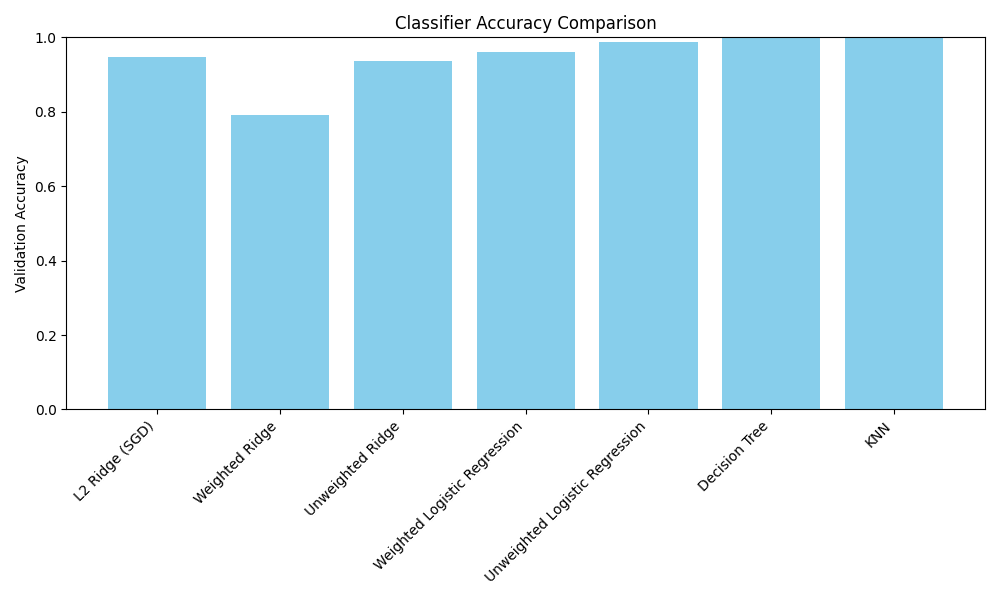

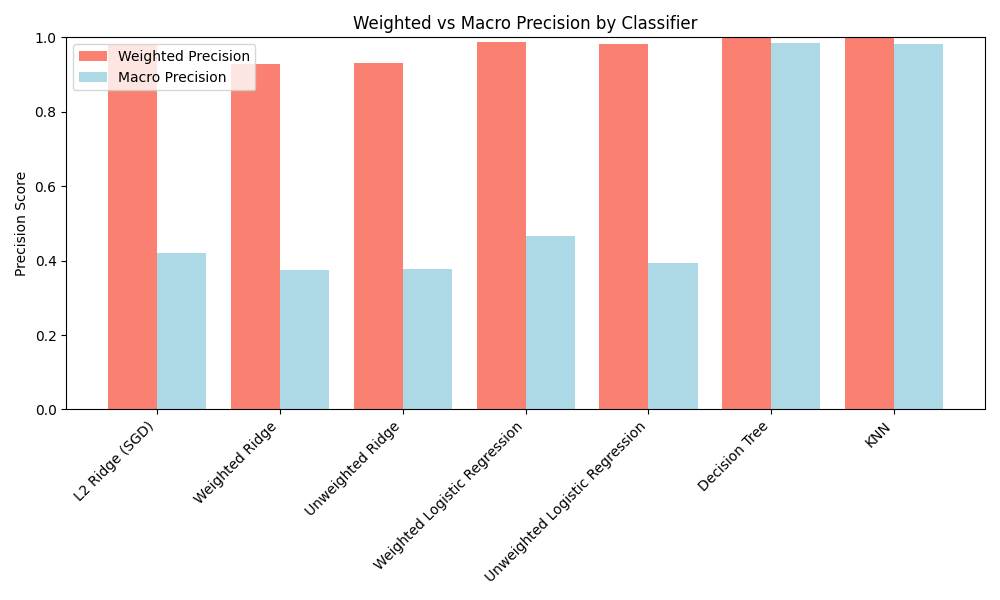

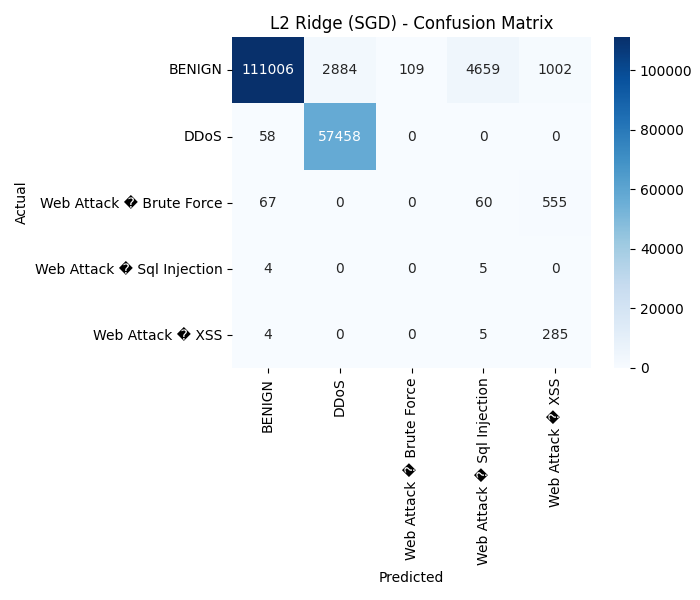

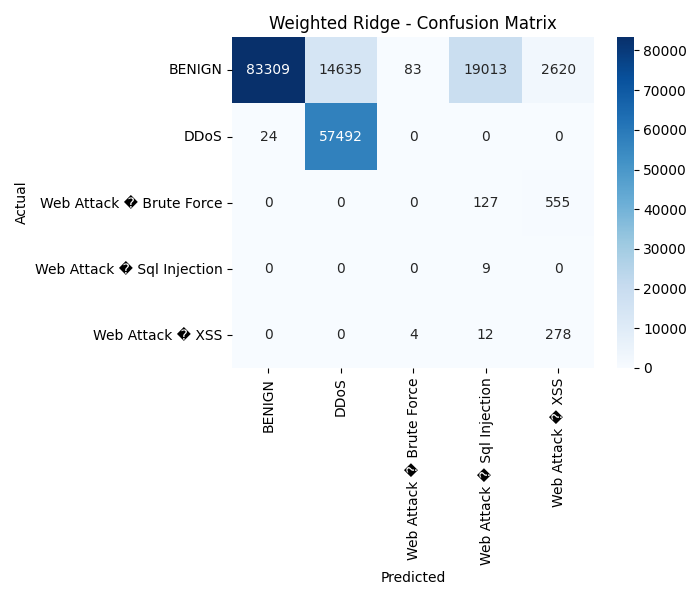

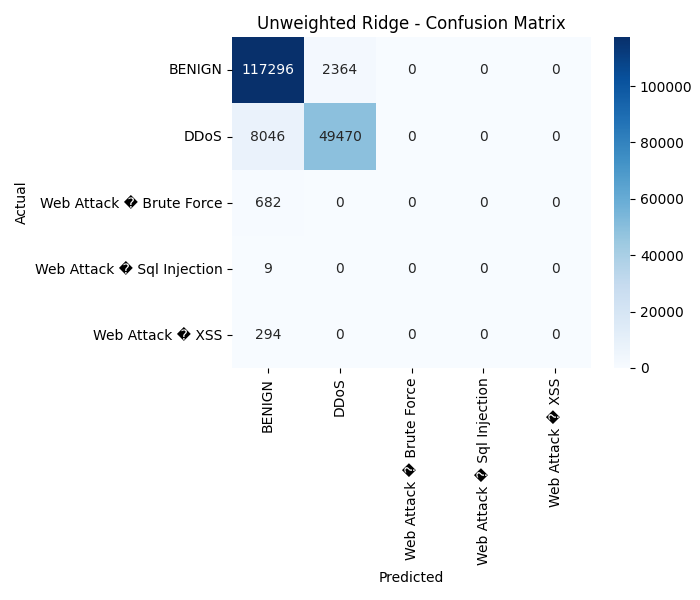

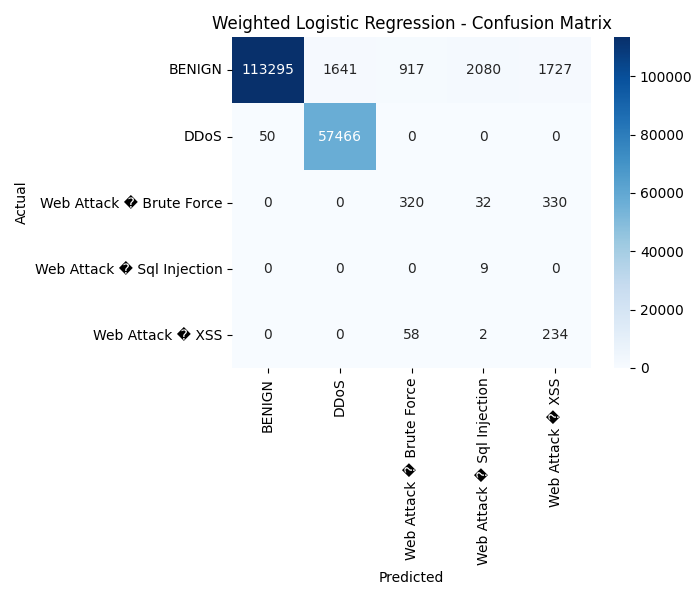

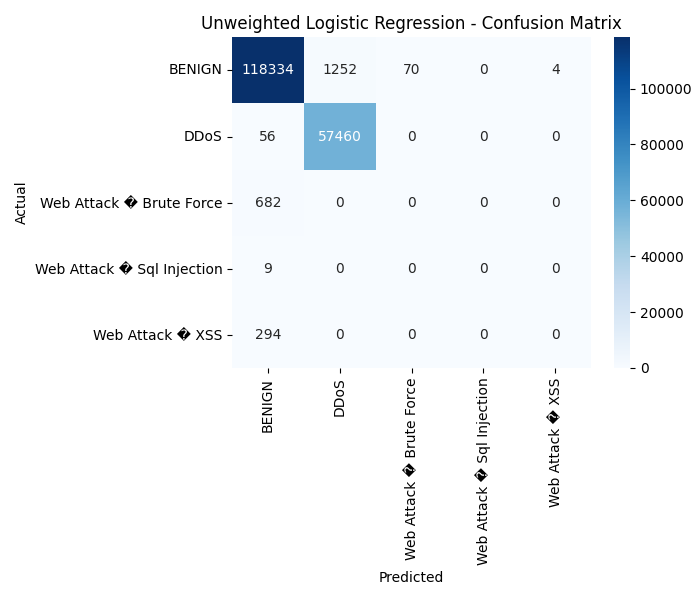

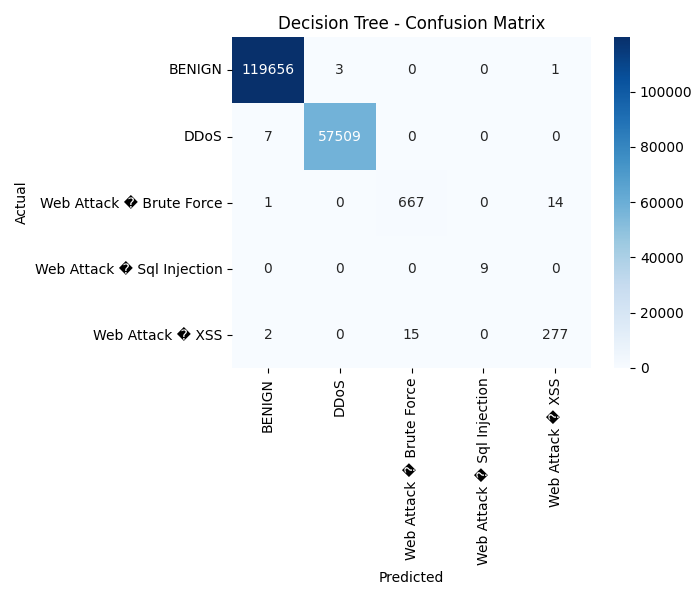

In [60]:
pipelineA_results = (
    run_classifiers(
        training_dataframe_a, training_label_dataframe_a, 
        validation_dataframe_a, validation_label_dataframe_a, 
        "Class", 1, True, "network_pipeline_A", True, True))

#### Pipeline B:

In [56]:
random_forest_rankings = read_file("rf_all_features_25pct.csv")
pipeline_b_features = random_forest_rankings.loc[random_forest_rankings["p-value"] < 0.1, "Feature"].tolist() + ["Class"]
training_dataframe_b  = reduce_to_columns(initial_training_dataframe, pipeline_b_features)
validation_dataframe_b  = reduce_to_columns(initial_validation_dataframe, pipeline_b_features)
test_dataframe_b  = reduce_to_columns(initial_test_dataframe, pipeline_b_features)


Training L2 Ridge (SGD)...
L2 Ridge (SGD) Validation Accuracy: 0.7305
L2 Ridge (SGD) Precision - Weighted: 0.8814, Macro: 0.3538
Classification Report:
                            precision    recall  f1-score   support

                    BENIGN       0.99      0.76      0.86    119660
                      DDoS       0.68      0.68      0.68     57516
  Web Attack   Brute Force       0.00      0.02      0.00       682
Web Attack   Sql Injection       0.00      0.22      0.00         9
          Web Attack   XSS       0.10      0.95      0.18       294

                  accuracy                           0.73    178161
                 macro avg       0.35      0.52      0.35    178161
              weighted avg       0.88      0.73      0.80    178161


Training Weighted Ridge...


C:\Users\Fixer\anaconda3\envs\ml3\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=8.86592e-17): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


Weighted Ridge Validation Accuracy: 0.8499
Weighted Ridge Precision - Weighted: 0.9438, Macro: 0.4398
Classification Report:
                            precision    recall  f1-score   support

                    BENIGN       0.94      0.84      0.88    119660
                      DDoS       0.97      0.89      0.93     57516
  Web Attack   Brute Force       0.22      0.06      0.09       682
Web Attack   Sql Injection       0.00      1.00      0.00         9
          Web Attack   XSS       0.07      0.95      0.13       294

                  accuracy                           0.85    178161
                 macro avg       0.44      0.74      0.41    178161
              weighted avg       0.94      0.85      0.89    178161


Training Unweighted Ridge...


C:\Users\Fixer\anaconda3\envs\ml3\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=2.86918e-17): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


Unweighted Ridge Validation Accuracy: 0.9217
Unweighted Ridge Precision - Weighted: 0.9219, Macro: 0.3766
Classification Report:
                            precision    recall  f1-score   support

                    BENIGN       0.90      0.99      0.94    119660
                      DDoS       0.98      0.79      0.87     57516
  Web Attack   Brute Force       0.00      0.00      0.00       682
Web Attack   Sql Injection       0.00      0.00      0.00         9
          Web Attack   XSS       0.00      0.00      0.00       294

                  accuracy                           0.92    178161
                 macro avg       0.38      0.36      0.36    178161
              weighted avg       0.92      0.92      0.92    178161


Training Weighted Logistic Regression...
Weighted Logistic Regression Validation Accuracy: 0.6426
Weighted Logistic Regression Precision - Weighted: 0.8920, Macro: 0.3548
Classification Report:
                            precision    recall  f1-score   s

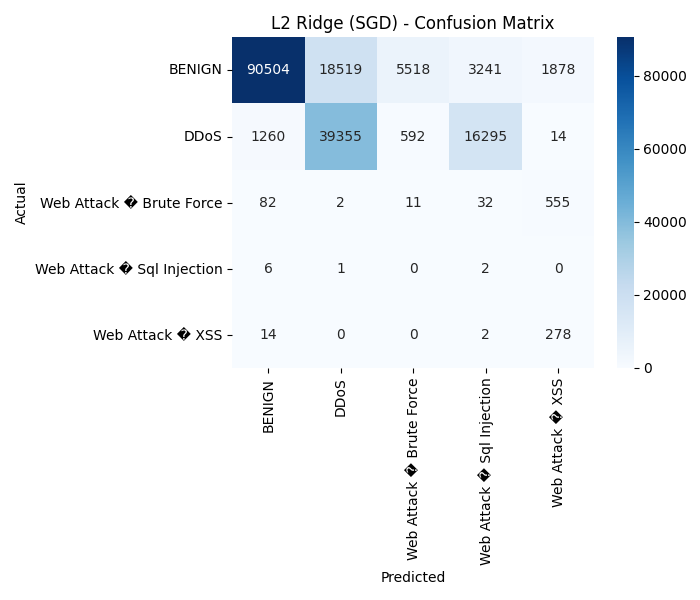

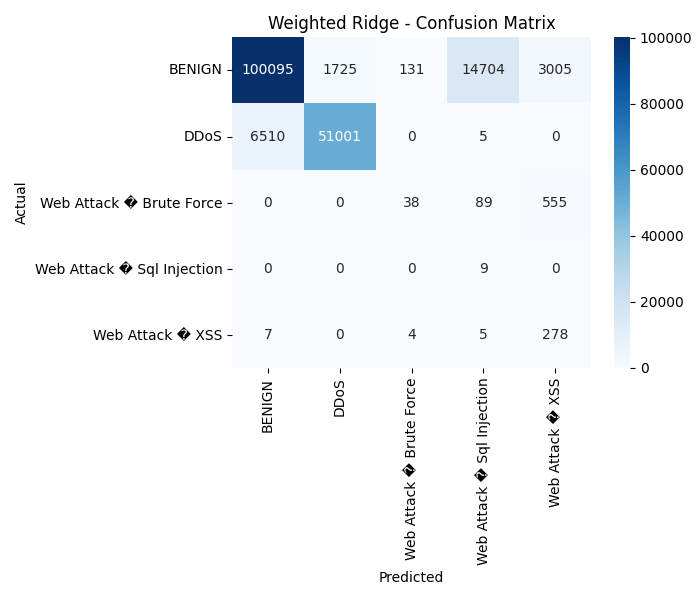

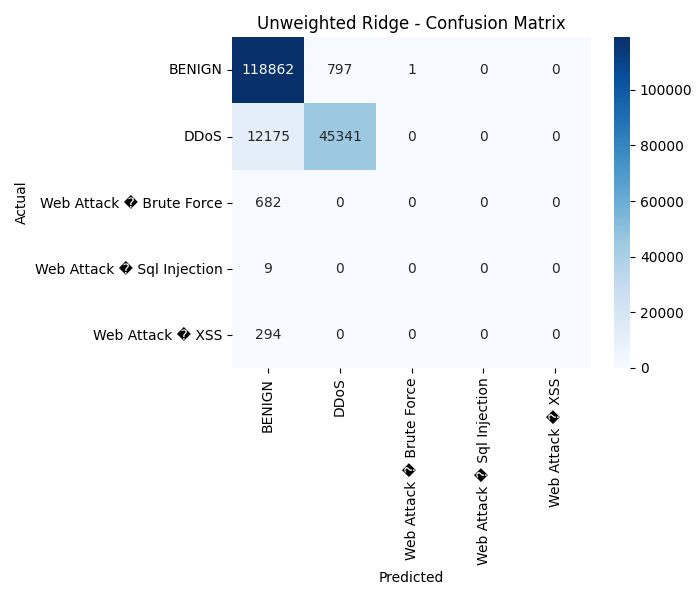

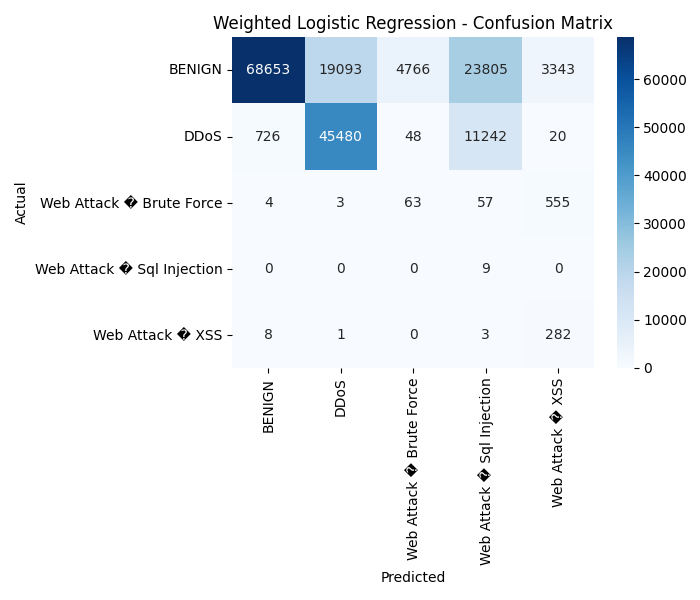

C:\Users\Fixer\AppData\Local\Temp\ipykernel_35680\2580067103.py:144: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(7, 6))


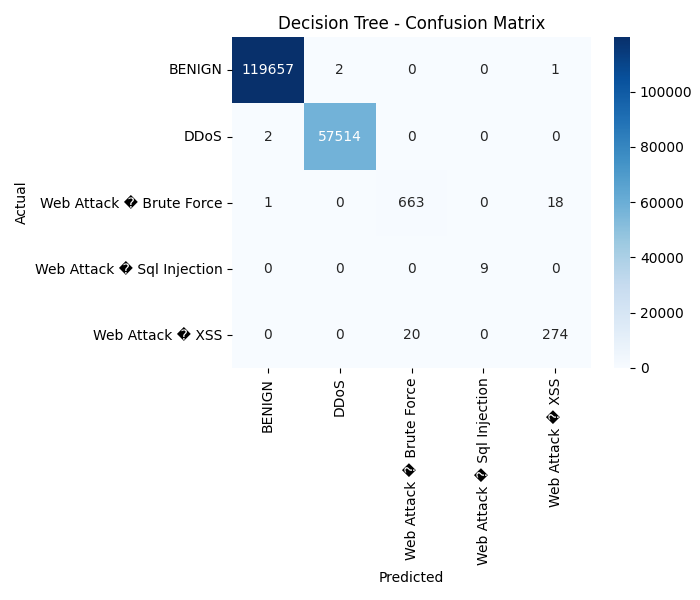

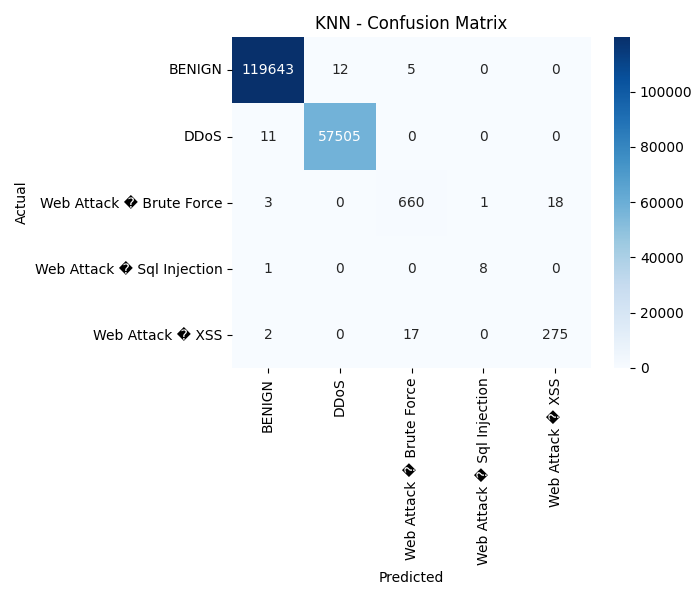

In [61]:
## Machine Learning Training for Pipeline B:

pipelineB_results = (
    run_classifiers(
        training_dataframe_b.drop(columns=["Class"]), training_dataframe_b["Class"], 
        validation_dataframe_b.drop(columns=["Class"]), validation_dataframe_b["Class"], 
        "Class", 1, True, "network_pipeline_B", True, True))

#### Pipeline C:

In [62]:
#pipelineC_datafram = readfile("pipelineC_pca_transformed_95.csv")
pipelineC_scaler = joblib.load("pipelineC_pca_scaler_95.pkl")
pipelineC_pca = joblib.load("pipelineC_pca_95.pkl")

In [63]:
# Transform training and validation sets
training_dataframe_c, training_label_dataframe_c = transform_with_pca(training_dataframe_b, pipelineC_scaler, pipelineC_pca, "Class")
validation_dataframe_c, validation_label_dataframe_c = transform_with_pca(validation_dataframe_b, pipelineC_scaler, pipelineC_pca, "Class")
test_dataframe_c, test_label_dataframe_c = transform_with_pca(test_dataframe_b, pipelineC_scaler, pipelineC_pca, "Class")


Training L2 Ridge (SGD)...
L2 Ridge (SGD) Validation Accuracy: 0.9108
L2 Ridge (SGD) Precision - Weighted: 0.9650, Macro: 0.4080
Classification Report:
                            precision    recall  f1-score   support

                    BENIGN       0.97      0.91      0.93    119660
                      DDoS       0.98      0.93      0.96     57516
  Web Attack   Brute Force       0.00      0.00      0.00       682
Web Attack   Sql Injection       0.00      0.56      0.00         9
          Web Attack   XSS       0.09      0.95      0.17       294

                  accuracy                           0.91    178161
                 macro avg       0.41      0.67      0.41    178161
              weighted avg       0.97      0.91      0.94    178161


Training Weighted Ridge...
Weighted Ridge Validation Accuracy: 0.6619
Weighted Ridge Precision - Weighted: 0.8244, Macro: 0.3868
Classification Report:
                            precision    recall  f1-score   support

          

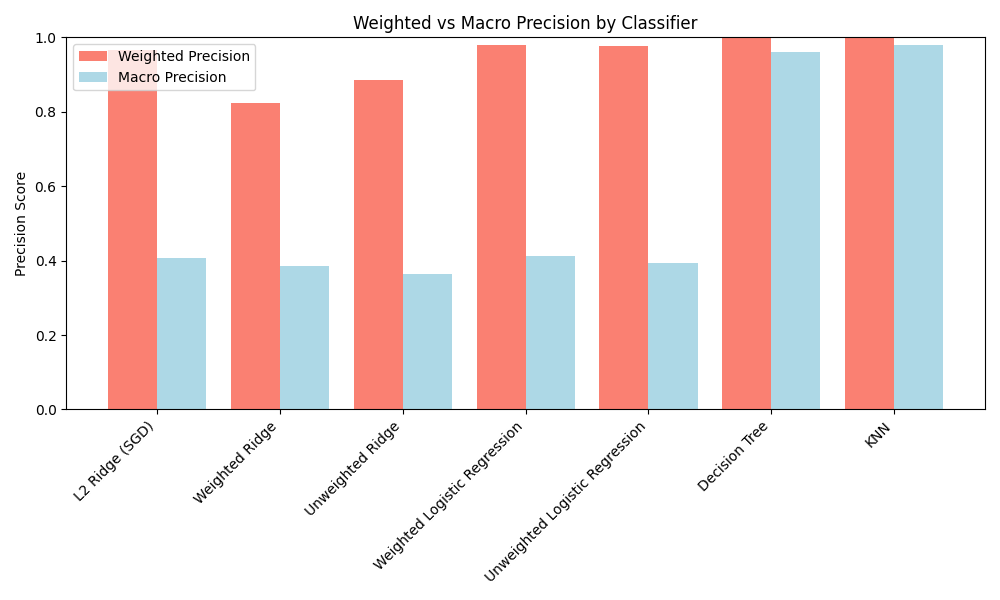

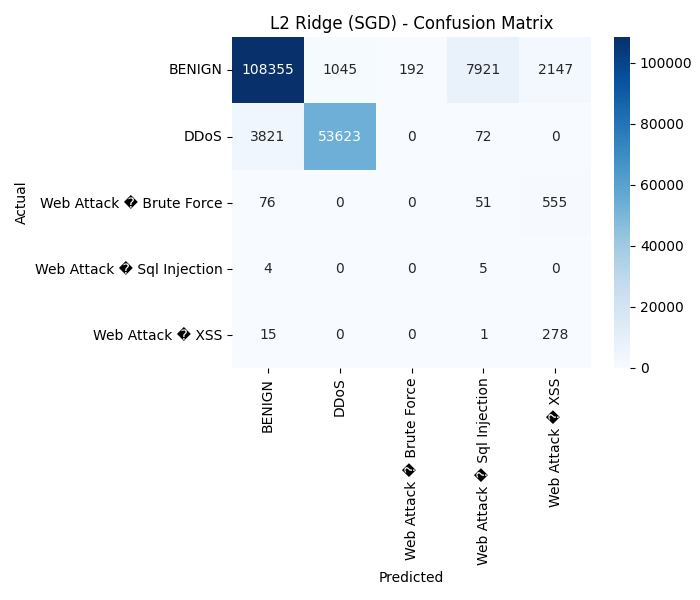

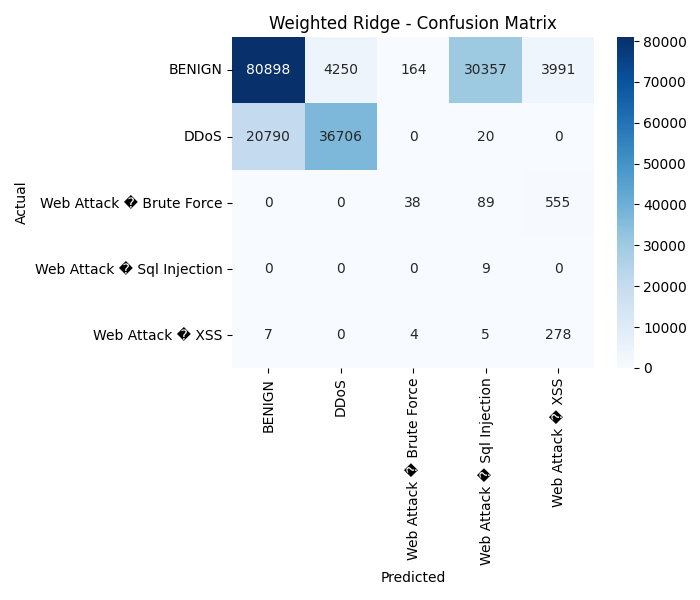

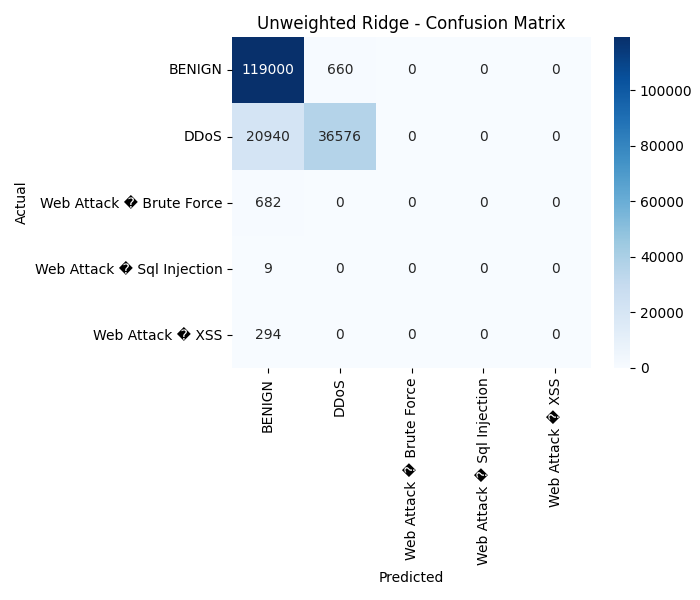

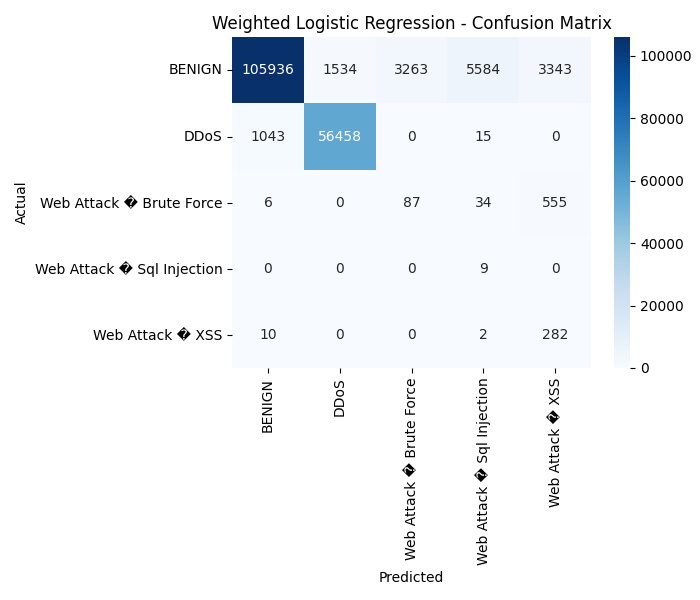

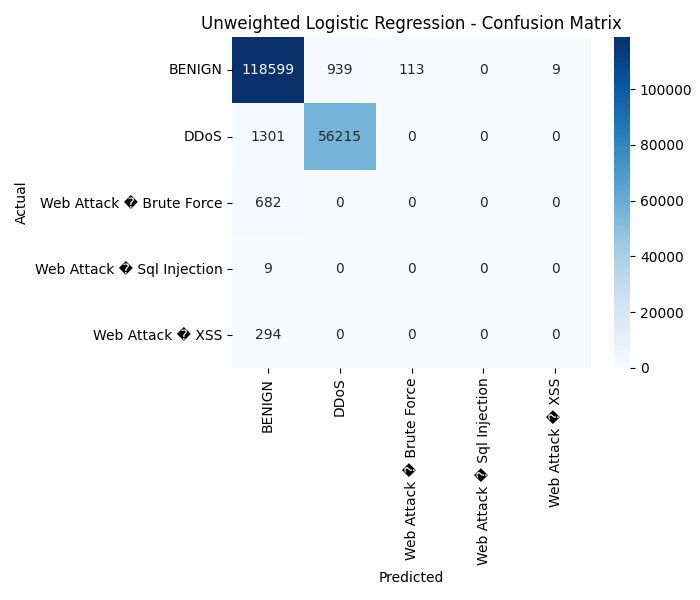

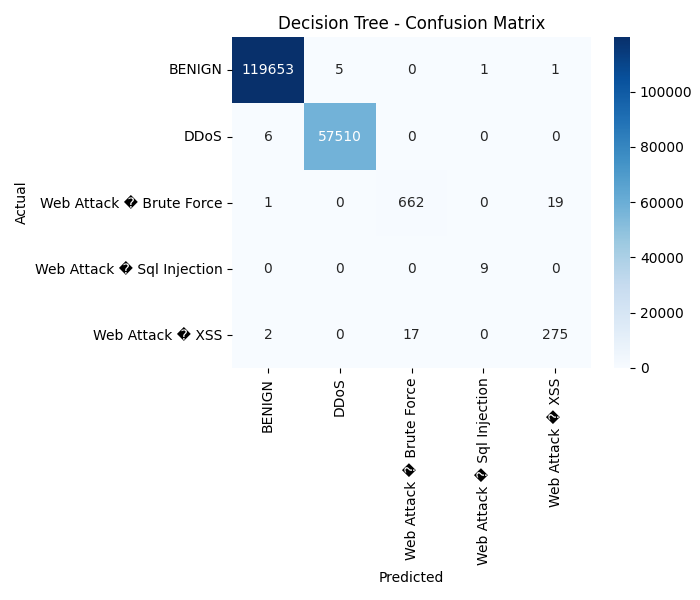

In [64]:
pipelineC_results = (
    run_classifiers(
        training_dataframe_c, training_label_dataframe_c, 
        validation_dataframe_c, validation_label_dataframe_c, 
        "Class", 1, True, "network_pipeline_C", True, True))

### Comparison of Pipelines and ML Models:

#### **Top 10 Models Across All Pipelines**

| Rank | Model                          | Pipeline | Accuracy | Weighted Precision | Macro Precision |
|------|--------------------------------|----------|----------|---------------------|------------------|
| 1    | **Decision Tree**              | **B**    | 0.9998   | 0.9998              | 0.9880         |
| 2    | **Decision Tree**              | A        | 0.9998   | 0.9998              | 0.9853           |
| 3    | **KNN**                        | A        | 0.9997   | 0.9997              | 0.9828           |
| 4    | **KNN**                        | C        | 0.9997   | 0.9997              | 0.9803           |
| 5    | **Decision Tree**              | C        | 0.9997   | 0.9997              | 0.9614           |
| 6    | **Unweighted Logistic Regression** | A    | 0.9867   | 0.9817              | 0.3940           |
| 7    | **Unweighted Logistic Regression** | C    | 0.9812   | 0.9765              | 0.3929           |
| 8    | **Weighted Logistic Regression**   | A    | 0.9616   | 0.9863              | 0.4651           |
| 9    | **L2 Ridge (SGD)**                 | A    | 0.9472   | 0.9785              | 0.4214           |
| 10   | **Unweighted Ridge**              | B     | 0.9217   | 0.9219              | 0.3766           |


#### **Pipeline-Wide Performance Comparison (Average of All Models)**

| Pipeline  | Avg Accuracy | Avg Weighted Precision | Avg Macro Precision |
|-----------|--------------|-------------------------|----------------------|
| **A**     | **0.9427**   | **0.9705**              | **0.6581**           |
| B         | 0.8737       | 0.9374                  | 0.4936               |
| C         | 0.9163       | 0.9604                  | 0.5483               |

> **Pipeline A** shows the strongest **overall performance**, both in accuracy and macro precision.  
> **Pipeline B** contains the lowest performing models in terms of consistency and macro precision.  
> **Pipeline C** is competitive with high scores, but slightly behind Pipeline A in consistency.


### **Key Takeaways**

- **Best Overall Model**: `Decision Tree` from **Pipeline A**, with near-perfect performance across all metrics (Accuracy: 0.9998, Macro Precision: 0.9853).
- **Most Consistent Pipeline**: **Pipeline A**, with high average scores across all models and excellent balance between weighted and macro precision.
- **High Performers**:
  - `KNN` and `Decision Tree` are consistently the most reliable models across all pipelines.
  - Logistic Regression (especially **unweighted**) shows strong accuracy and weighted precision but underperforms on macro precision — struggling to handle rare classes.
- **Modeling Challenge**:
  - Many models exhibit poor performance for minority classes (e.g., `Web Attack – Brute Force`, `SQL Injection`, and `XSS`), as evidenced by consistently low macro precision in Ridge and Logistic Regression models.
  - Tree-based and KNN models perform better in detecting rare events due to their non-linear and instance-based decision boundaries.


### Improvements:

The dataset is heavily imbalanced, and performance for minority classes remains low for linear models. While `Decision Tree` and `KNN` can handle the imbalance better, future work should explore SMOTE or undersampling to compensate for this.
Ideally however, there would be more data recorded for these rare classes, allowing for refinement of the model without needing SMOTE or undersampling. 

### Conclusion:

The results clearly show that Pipeline A's approach yielded the **most reliable and highest-performing models**, particularly in how well it handled the class imbalance. This is likely because it underwent the least feature reduction, indicating that feature reduction was carried out too rigerously on the other two pipelines. Given that models like `Decision Tree` and `KNN` achieved near-perfect validation metrics, and that macro precision exceeded 0.98 for the best performers, the modeling task was highly successful. This setup is well-suited for distinguishing the majority and minority classes in the given network traffic classification dataset.


#### Conclusions after Training:

From the success metrics defined, it was concluded that the most successful model was the Decision Tree model applied to the Feature Selection and dimensionality reduction produced from Pipeline B, which utilised a permutation based random forest approach to select and rank features with a p score to indicate significance.

The model could have potentially been improved if there was a more even distribution in the types of activity performed. Due to the scarcity in datasetSS and SQL attacks, all models struggled more with accurately detecting and differentiating for these rarer classes. Otherwise, I see the model produced as a resounding success, classifying traffic into the relevant categories with a 99.98% accuracy. 

Feature selection for Pipeline B could have been potentially more accurate if I were to have the Random Forest Permutation Selection conducted on the full dataset, as opposed to the 25% stratified sample. 

This would have potentially yielded a more refined feature ranking and selection, however due to the constraints of computing power and time, a 25% stratified sample was utilised to ensure a representative distribution of data from all classes. 

Given that this still produced Decision tree and KNN models with respectively 99.98% and 99.97% weighted average accuracy, I believe that this was still highly successful, with the Pipeline B Decision Tree model being selected as the most successful due to it's superior performance Metrics.

As I performed a split into training, test and validation data, I am able to verify this success rate below:
### Verification of Model Performance: Pipeline B

Loading model from: models/network_pipeline_B/Decision_Tree.pkl
Validation Accuracy: 0.9998
Precision - Weighted: 0.9998, Macro: 0.9880

Classification Report:
                            precision    recall  f1-score   support

                    BENIGN       1.00      1.00      1.00    119659
                      DDoS       1.00      1.00      1.00     57514
  Web Attack   Brute Force       0.98      0.98      0.98       683
Web Attack   Sql Injection       1.00      1.00      1.00         9
          Web Attack   XSS       0.96      0.96      0.96       294

                  accuracy                           1.00    178159
                 macro avg       0.99      0.99      0.99    178159
              weighted avg       1.00      1.00      1.00    178159



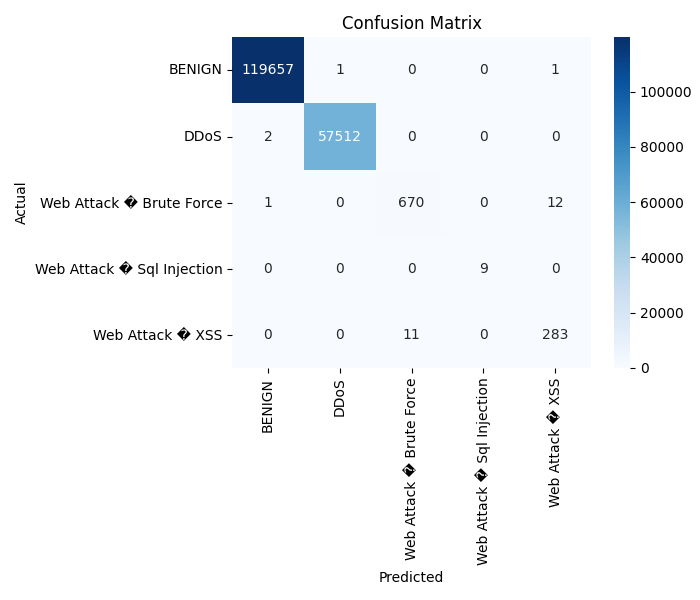

In [71]:
results = evaluate_model(model_path="models/network_pipeline_B/Decision_Tree.pkl",
                         validation_dataset=test_dataframe_b.drop(columns=["Class"]),
                         validation_labels=test_dataframe_b["Class"],
                         label_encoder=joblib.load("models/network_pipeline_B/label_encoder.pkl"))

### Verification of Model Performance: Pipeline B KNN:

Loading model from: models/network_pipeline_B/KNN.pkl
Validation Accuracy: 0.9996
Precision - Weighted: 0.9996, Macro: 0.9606

Classification Report:
                            precision    recall  f1-score   support

                    BENIGN       1.00      1.00      1.00    119659
                      DDoS       1.00      1.00      1.00     57514
  Web Attack   Brute Force       0.97      0.96      0.97       683
Web Attack   Sql Injection       0.89      0.89      0.89         9
          Web Attack   XSS       0.94      0.95      0.94       294

                  accuracy                           1.00    178159
                 macro avg       0.96      0.96      0.96    178159
              weighted avg       1.00      1.00      1.00    178159



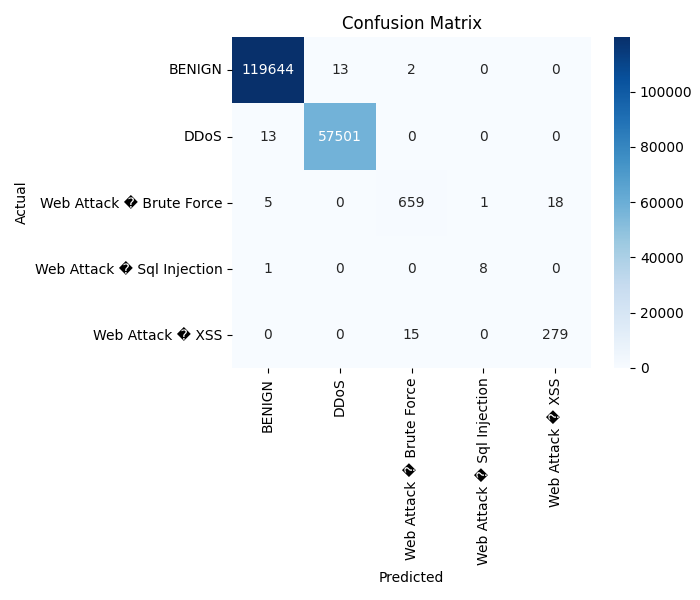

In [72]:
results = evaluate_model(model_path="models/network_pipeline_B/KNN.pkl",
                         validation_dataset=test_dataframe_b.drop(columns=["Class"]),
                         validation_labels=test_dataframe_b["Class"],
                         label_encoder=joblib.load("models/network_pipeline_B/label_encoder.pkl"))

## Comparison of Best model (Decision Tree) to the same approaches run on the data set without any dimensionality reduction or feature selection:

As seen below, the Decision tree trained on the reduced dataset performs marginally better despite having far fewer datapoints to draw from, proving that it is a more desirable model then merely running a decision tree on the unreduced dataset. 

### Decision Tree: Pipeline B vs No Dimensionality Reduction:

#### Pipeline B:

Loading model from: models/network_pipeline_B/Decision_Tree.pkl
Validation Accuracy: 0.9998
Precision - Weighted: 0.9998, Macro: 0.9880

Classification Report:
                            precision    recall  f1-score   support

                    BENIGN       1.00      1.00      1.00    119659
                      DDoS       1.00      1.00      1.00     57514
  Web Attack   Brute Force       0.98      0.98      0.98       683
Web Attack   Sql Injection       1.00      1.00      1.00         9
          Web Attack   XSS       0.96      0.96      0.96       294

                  accuracy                           1.00    178159
                 macro avg       0.99      0.99      0.99    178159
              weighted avg       1.00      1.00      1.00    178159



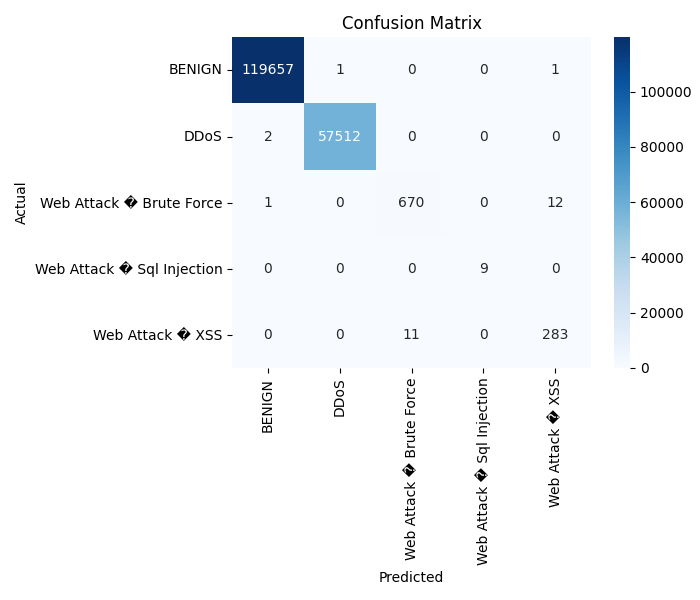

In [73]:
results = evaluate_model(model_path="models/network_pipeline_B/Decision_Tree.pkl",
                         validation_dataset=test_dataframe_b.drop(columns=["Class"]),
                         validation_labels=test_dataframe_b["Class"],
                         label_encoder=joblib.load("models/network_pipeline_B/label_encoder.pkl"))

#### No Dimensionality Reduction:

In [69]:
non_reduced_training_data = clean_inf_nan(pd.concat([training_dataframe, training_labels], axis=1))
non_reduced_validation_data = clean_inf_nan(pd.concat([validation_dataframe, validation_labels], axis=1))
non_reduced_test_data = clean_inf_nan(pd.concat([test_dataframe, test_labels], axis=1))


Training: Decision Tree
Decision Tree Accuracy: 0.9998
Decision Tree Precision - Weighted: 0.9998, Macro: 0.9825

Classification Report:
                            precision    recall  f1-score   support

                    BENIGN       1.00      1.00      1.00    119660
                      DDoS       1.00      1.00      1.00     57516
  Web Attack   Brute Force       0.97      0.97      0.97       682
Web Attack   Sql Injection       1.00      1.00      1.00         9
          Web Attack   XSS       0.94      0.93      0.94       294

                  accuracy                           1.00    178161
                 macro avg       0.98      0.98      0.98    178161
              weighted avg       1.00      1.00      1.00    178161



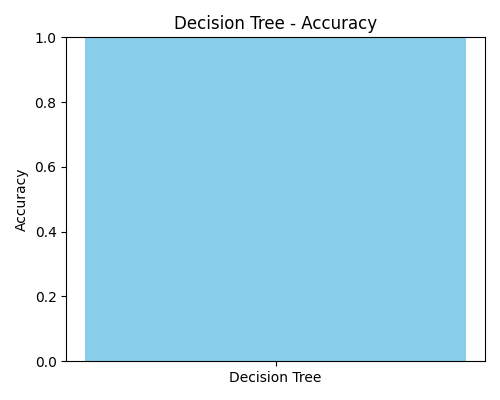

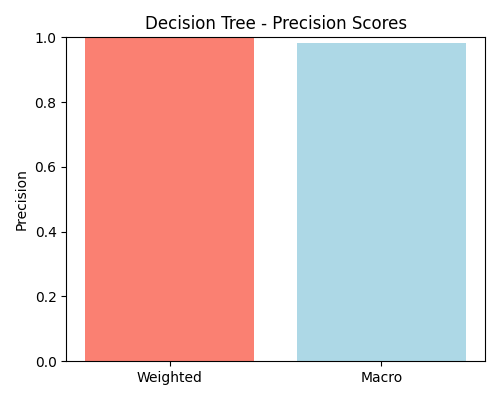


Model, encoder, and metrics saved to: models\network_no_reduction_dtree/


{'accuracy': 0.999775483972362,
 'precision': {'weighted': 0.9997748289300769, 'macro': 0.9824631839051635},
 'model': DecisionTreeClassifier(random_state=1),
 'label_encoder': LabelEncoder()}

In [70]:
#Decision Tree - No Dimensionality Reduction
run_single_classifier(
    non_reduced_training_data.drop(columns=["Class"]),
    non_reduced_training_data["Class"],
    non_reduced_validation_data.drop(columns=["Class"]),
    non_reduced_validation_data["Class"],
    "Decision Tree", 1, True, False, True, "network_no_reduction_dtree")

### Conclusion on findings comparing Pipeline B Decision Tree with Decision tree performed without Reduction:

#### Decision Tree Performance: Pipeline B (21 Features)

- **Validation Accuracy**: **0.9998**  
- **Weighted Precision**: **0.9998**  
- **Macro Precision**: **0.9880**  

| Class                     | Precision | Recall | F1-score | Support  |
|---------------------------|-----------|--------|----------|----------|
| BENIGN                    | 1.00      | 1.00   | 1.00     | 119,659  |
| DDoS                      | 1.00      | 1.00   | 1.00     | 57,514   |
| Web Attack – Brute Force  | 0.98      | 0.98   | 0.98     | 683      |
| Web Attack – Sql Injection| 1.00      | 1.00   | 1.00     | 9        |
| Web Attack – XSS          | 0.96      | 0.96   | 0.96     | 294      |
| **Accuracy**              |           |        | **1.00** | 178,159  |
| **Macro avg**             | 0.99      | 0.99   | 0.99     | 178,159  |
| **Weighted avg**          | 1.00      | 1.00   | 1.00     | 178,159  |


#### Decision Tree Performance: Raw Dataset (78 Features)

- **Validation Accuracy**: **0.9998**  
- **Weighted Precision**: **0.9998**  
- **Macro Precision**: **0.9825**  

| Class                     | Precision | Recall | F1-score | Support  |
|---------------------------|-----------|--------|----------|----------|
| BENIGN                    | 1.00      | 1.00   | 1.00     | 119,659  |
| DDoS                      | 1.00      | 1.00   | 1.00     | 57,514   |
| Web Attack – Brute Force  | 0.97      | 0.97   | 0.97     | 683      |
| Web Attack – Sql Injection| 1.00      | 1.00   | 1.00     | 9        |
| Web Attack – XSS          | 0.94      | 0.93   | 0.94     | 294      |
| **Accuracy**              |           |        | **1.00** | 178,159  |
| **Macro avg**             | 0.98      | 0.98   | 0.98     | 178,159  |
| **Weighted avg**          | 1.00      | 1.00   | 1.00     | 178,159  |

---

### Conclusion

Both models achieve near-perfect accuracy (~99.98%) and weighted precision (0.9998). 
The model trained on the **reduced feature set (21 features)** selected via permutation importance on a small stratified subset (25%) of the full dataset very large dataset, which was too large handle for random forest permutation as a whole. This model slightly outperforms the raw model in macro precision (0.9880 vs 0.9825), indicating better balanced performance across all classes.

This demonstrates that performing feature selection on a representative smaller sample of a large dataset can effectively reduce dimensionality without degrading performance, improving model interpretability and reducing computational cost.
